# Subtask №3 | Test Task PA
##### _Pavlo Kukurik_

In [1]:
# Importing libs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import color_palette

In [2]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (30, 10)

### Reading Files

In [3]:
df = pd.read_csv('data/reading_data.csv')
print(df.head(5))

   Unnamed: 0   user_id           event_time        country  \
0           0  LM49ELXC  2024-06-02 04:25:35  United States   
1           1  7XTQHMH8  2024-06-03 21:46:51          Spain   
2           2  2IB2IK8U  2024-05-17 18:47:01  United States   
3           3  O9C6WXJE  2024-06-07 01:18:14  United States   
4           4  4GRWXHNP  2024-05-03 13:16:34      Hong Kong   

          event_type event_properties_book_id event_properties_format  \
0  summary_last_page     0dbe62f1ca984daf881a                    text   
1      summary_start     WUOlTHMd11KUsvKSMhPx                   audio   
2      summary_start     AJfjqmnZfcGYTpDtYhzz                   audio   
3      summary_start     1384d32a0cc5415ba60b                   audio   
4  summary_last_page     1Z9KhNI1CyXJMDXEDdgN                   audio   

  user_properties_age  
0                  32  
1                  43  
2                  57  
3                  45  
4                  30  


In [4]:
summary_df = pd.read_csv('data/summary_info.csv')
summary_df

,topic,book_id
0,Health,012399fc36f74c489e4e
1,Health,01b85da7d21c478ab4b1
2,Health,0eef51fd8ce54d51bff6
3,Health,0efd511e57ea414ab5ab
4,Health,1251469de9ce40deace4
...,...,...
4340,Narrative Nonfiction,kf1lgMc5cwj6Oy4pY8qg
4341,Narrative Nonfiction,nfll6gVlKSMITW1bUCUH
4342,Narrative Nonfiction,rxFsAqLVPUcrZQi349P7
4343,Narrative Nonfiction,uF4C0V8faBoDaZvaKpar


### Short Data Overview

In [5]:
summary_df['topic'].value_counts()

topic
Self-Reflection       99
Daily Optimization    96
Entrepreneurship      95
Team Dynamics         93
Mindfulness           84
                      ..
Survival               8
Natural World          8
Decision-Making        8
Personal Stories       8
Intimacy               8
Name: count, Length: 166, dtype: int64

In [6]:
df['user_id'].value_counts()

user_id
###          1564
INVALID      1512
???          1506
null_id      1479
broken_id    1419
             ... 
UOKC0FOY        1
VYHS7GPC        1
1S30KW5O        1
7Q1ZRZPV        1
TU4EVXR7        1
Name: count, Length: 228319, dtype: int64

In [7]:
df.isna().sum()

Unnamed: 0                      0
user_id                         0
event_time                      0
country                         0
event_type                      0
event_properties_book_id        0
event_properties_format         0
user_properties_age         21359
dtype: int64

In [8]:
summary_df.isna().sum()

topic      0
book_id    0
dtype: int64

In [9]:
# df[df["event_properties_book_id"].str.match(r"^[a-zA-Z0-9]{20}$", na=False)]
df[~df["event_properties_book_id"].str.match(r"^[a-zA-Z0-9]{20}$", na=False)]

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
1837,1837,8ZZS3ZSS,2024-06-28 12:37:57,Germany,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,21
2344,2344,UJE53I3Y,2024-06-29 23:40:12,United Kingdom,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,59
10088,10088,9RZTJZ6T,2024-06-29 07:43:55,Australia,summary_start,9363ef58-bf72-4a32-b32c-39ff0540c3b8,audio,20
13499,13499,T3WJI567,2024-06-21 19:01:58,United States,summary_last_page,a254a694-2e66-4854-b8b6-85a735c95613,text,22
16309,16309,GHYKKHWN,2024-06-30 14:14:19,Chile,summary_start,8bb282f0-b6be-42e7-a741-c21cff2c9cbd,audio,error
...,...,...,...,...,...,...,...,...
512958,512958,Z1FEOYHY,2024-06-26 23:51:35,United States,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,33
517150,517150,L50FTHVJ,2024-06-29 17:23:48,South Africa,summary_last_page,8bb282f0-b6be-42e7-a741-c21cff2c9cbd,text,47
518930,518930,OO9G4ZS1,2024-06-27 13:26:33,United States,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,32
521291,521291,FVJ4MRIG,2024-06-26 22:04:31,Netherlands,summary_start,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,52


After 2024-06-15 07:57:05, atypical values such as `a254a694-2e66-4854-b8b6-85a735c95613' began to appear in the data in the` `event_properties_book_id` column, relative to the usual `WUOlTHMd11KUsvKSMhPx`. But upon closer inspection, it seems to be completely `“clean”` data

### Cleaning the data and unite the datasets


In [10]:
df = df[df["user_id"] != "INVALID"]
df= df[df["user_id"].str.match(r"^[A-Za-z0-9]+$", na=False)]

df['user_id'].value_counts()

user_id
O608SMH5    117
PHS975R4     98
Y58F6GCD     95
OU037AKN     90
KTREUFV8     87
           ... 
VYHS7GPC      1
1S30KW5O      1
7Q1ZRZPV      1
TU4EVXR7      1
VRYAROZ7      1
Name: count, Length: 228314, dtype: int64

In [11]:
df.loc[:, "user_properties_age"] = pd.to_numeric(df["user_properties_age"], errors='coerce')
df = df[df["user_properties_age"].notna()]

df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0
...,...,...,...,...,...,...,...,...
523138,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0
523139,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0
523140,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0
523141,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0


In [12]:
users_with_multiple_books = (
    df.groupby(["user_id", "event_time"])["event_properties_book_id"]
    .nunique()
    .reset_index()
)

users_with_multiple_books = users_with_multiple_books[users_with_multiple_books["event_properties_book_id"] > 1]
multiple_books_df = df.merge(users_with_multiple_books[["user_id", "event_time"]], on=["user_id", "event_time"])

multiple_books_df


,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,56251,J90L49VK,2024-04-10 13:32:48,Mexico,summary_start,EuZmFy0nkKg5FWvJce6H,audio,43.0
1,168960,J90L49VK,2024-04-10 13:32:48,Mexico,summary_start,ce8e61e033b24511ac96,audio,39.0
2,127521,H5ZB6TOU,2024-06-09 13:59:27,Spain,summary_start,KaPrg9t8eFDTbdJtVKfe,audio,26.0
3,522403,H5ZB6TOU,2024-06-09 13:59:27,Spain,summary_start,d2301399914f48e68216,audio,21.0
4,253045,VV6D8D9I,2024-06-07 23:49:54,Philippines,summary_start,c51cf7bddd794b42808b,audio,38.0
5,386113,VV6D8D9I,2024-06-07 23:49:54,Philippines,summary_start,5a0967c6a1744c5594aa,audio,28.0
6,294145,3NTR18VI,2024-04-02 10:10:13,United States,summary_start,b8a55d8d3aa04da8975b,audio,64.0
7,308233,3NTR18VI,2024-04-02 10:10:13,United States,summary_start,8764d9eaeee2432d8df8,audio,61.0
8,309979,KJYCCYNA,2024-05-14 14:29:48,Ecuador,summary_start,479fe70467db49bd9192,audio,23.0
9,426481,KJYCCYNA,2024-05-14 14:29:48,Ecuador,summary_start,gN4R61QZBDlaUB4DcohA,audio,64.0


In [13]:
# Drop sers who read different books at the same time
users_to_remove = users_with_multiple_books["user_id"].unique()
df = df[~df["user_id"].isin(users_to_remove)]

In [14]:
# Drop duplicates (when same user make several events at the same time: 155 cases)
df = df.drop_duplicates(subset=["user_id", "event_time"], keep="first").copy()
df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0
...,...,...,...,...,...,...,...,...
523138,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0
523139,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0
523140,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0
523141,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0


Users who were reading summaries at the same time were removed from the dataset. In one case, these are just duplicates that can be explained by a technical failure, and in the other case, these are users who were reading different books at the same time. This can also be a technical failure in recording data, but it can also indicate that several people are using the same account. In this case, it is neither rational nor representative to consider such users in further analysis. In addition, it may be a sign that the user's account has been hacked or that the user has voluntarily shared their account. In both cases, this may be a reason to notify the user and block the account (in the first case to protect the user from fraudsters, in the second case to find out the details if, for example, such behavior contradicts the user's rules)

In [15]:
summary_df = summary_df.drop_duplicates(subset="book_id", keep="first").copy()

merged_df = df.merge(summary_df, left_on="event_properties_book_id", right_on="book_id", how="left")
merged_df["topic"] = merged_df["topic"].fillna("Unknown")
merged_df = merged_df.drop(columns=["book_id"])


merged_df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0,Education
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity
...,...,...,...,...,...,...,...,...,...
489616,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition
489617,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0,Daily Optimization
489618,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0,Mind Enhancement
489619,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0,Financial Management


In [16]:
unknown_books = merged_df[merged_df["topic"] == "Unknown"]
unknown_books['user_properties_age'].value_counts()

user_properties_age
63.0    1439
21.0    1429
33.0    1416
67.0    1407
48.0    1406
59.0    1402
64.0    1400
53.0    1397
38.0    1393
40.0    1393
24.0    1392
25.0    1390
34.0    1383
46.0    1382
26.0    1382
52.0    1380
42.0    1379
66.0    1379
36.0    1377
65.0    1372
54.0    1371
27.0    1371
49.0    1371
50.0    1369
51.0    1368
29.0    1368
18.0    1363
61.0    1363
47.0    1355
35.0    1353
41.0    1352
37.0    1349
20.0    1348
19.0    1347
22.0    1342
43.0    1340
23.0    1339
56.0    1338
45.0    1335
62.0    1333
55.0    1328
39.0    1328
60.0    1324
31.0    1324
44.0    1321
32.0    1321
30.0    1318
58.0    1318
57.0    1306
28.0    1296
Name: count, dtype: int64

### Functions

In [17]:
def age_distribution(df_name: pd.DataFrame, unique=False) -> plt.Figure():
    """
    This function plots the age distribution by users id.
    :param unique:
    :param df_name:
    :return:
    """

    if unique:
        sns.histplot(df_name.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color='crimson')
        plt.xlabel("Вік користувача")
        plt.ylabel("Кількість унікальних користувачів")
        plt.title("Розподіл віку унікальних користувачів")
        plt.show()

    else:
        sns.histplot(df_name["user_properties_age"],bins=50, color='crimson')
        plt.xlabel("Вік користувача")
        plt.ylabel("Кількість читачів")
        plt.title("Розподіл віку користувачів (Активнсть користувачів за віком)")
        plt.show()

In [18]:
def age_distribution_separately(df_1: pd.DataFrame, df_2: pd.DataFrame, df_3: pd.DataFrame, unique=False) -> plt.Figure():
    """
    This function plots the age distribution by users id
    :param df_1: DataFrame 1 with whole data
    :param df_2: DataFrame 2 with users who don`t change age
    :param df_3: DataFrame 3 with users who change age
    :param unique:
    :return:
    """
    if unique:
        sns.histplot(df_1.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="orange", label="Загалом")
        sns.histplot(df_2.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="crimson", label="Не змінили вік")
        sns.histplot(df_3.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="seagreen", label="Змінювали вік", alpha=1)
        plt.legend()
        plt.title('Розподіл користувачі за віком')
        plt.show()

    else:
        sns.histplot(df_1["user_properties_age"], bins=50, color="orange", label="Загалом")
        sns.histplot(df_3["user_properties_age"], bins=50, color="seagreen", label="Змінювали вік")
        sns.histplot(df_2["user_properties_age"], bins=50, color="crimson", label="Не змінили вік", alpha=1)
        plt.legend()
        plt.title('Активність користувачів за віком')
        plt.show()

In [19]:
def plot_event_distributions(df_name: pd.DataFrame) -> plt.Figure():

    type_event = df_name['event_type'].value_counts()
    event_format = df_name['event_properties_format'].value_counts()

    sns.set_palette("Reds")

    fig, axes = plt.subplots(1, 2, figsize=(25, 15))

    axes[0].pie(type_event, labels=type_event.index, autopct="%1.1f%%", startangle=180, colors=sns.color_palette("Reds", len(type_event)))
    axes[0].set_title("Distribution of Event Type")

    axes[1].pie(event_format, labels=event_format.index, autopct="%1.1f%%", startangle=180, colors=sns.color_palette("Reds", len(event_format)))
    axes[1].set_title("Distribution of Event Format")

    plt.tight_layout()
    plt.show()

In [20]:
def plot_country_activity(df_name: pd.DataFrame) -> plt.Figure():
    """
    The func visualise the distribution of counties by user
    :param df_name: The dataframe`s name
    :return: show the distribution of counties by user
    """
    top_countries = df_name["country"].value_counts().head(10)
    unique_users_per_country = df_name.groupby("country")["user_id"].nunique().nlargest(10)

    sns.set_palette("Reds")
    fig, axes = plt.subplots(1, 2, figsize=(25, 10))

    sns.barplot(x=top_countries.index, y=top_countries.values, ax=axes[0], palette="Reds")
    axes[0].set_title("Top 10 Active Countries by Total Events")
    axes[0].set_ylabel("Total Events")
    axes[0].set_xlabel("Country")
    axes[0].tick_params(axis='x', rotation=45)

    sns.barplot(x=unique_users_per_country.index, y=unique_users_per_country.values, ax=axes[1], palette="Reds")
    axes[1].set_title("Top 10 Countries by Unique Users")
    axes[1].set_ylabel("Unique Users")
    axes[1].set_xlabel("Country")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [71]:
def analyze_book_completion(df_name: pd.DataFrame) -> plt.Figure():
    """
    Analyze book completion rates based on user activity.
    :param df_name: DataFrame containing user interactions with books.
    :return: Prints summary statistics and displays a visualization.
    """

    completion_rates = df_name.groupby(["user_id", "event_properties_book_id"])["event_type"].nunique()
    fully_tracked_books = completion_rates[completion_rates == 2].count()
    total_started_books = (df_name["event_type"] == "summary_start").sum()
    completion_rate = fully_tracked_books / total_started_books if total_started_books > 0 else 0

    started_books = set(zip(
        df_name.loc[df_name["event_type"] == "summary_start", "user_id"],
        df_name.loc[df_name["event_type"] == "summary_start", "event_properties_book_id"]
    ))

    last_page_only = df_name[
        (df_name["event_type"] == "summary_last_page") &
        (~df_name[["user_id", "event_properties_book_id"]].apply(tuple, axis=1).isin(started_books))
    ]

    last_page_users = df_name.loc[df_name["event_type"] == "summary_last_page", "user_id"].nunique()
    start_users = df_name.loc[df_name["event_type"] == "summary_start", "user_id"].nunique()
    last_page_without_start_users = last_page_users - start_users

    users_with_only_last_page = set(df_name.loc[df_name["event_type"] == "summary_last_page", "user_id"]) - \
                                set(df_name.loc[df_name["event_type"] == "summary_start", "user_id"])

    print(f"Unique user-book pairs: {completion_rates.shape[0]}")
    print(f"Books fully tracked (started and completed): {fully_tracked_books}")
    print(f"Total books started: {total_started_books}")
    print(f"Estimated completion rate: {completion_rate:.2%}")
    print(f"Records with 'summary_last_page' but no 'summary_start': {last_page_only.shape[0]}")
    print(f"Users with 'summary_last_page': {last_page_users}")
    print(f"Users with 'summary_start': {start_users}")
    print(f"Percentage of users with 'summary_last_page' but no 'summary_start': {(last_page_without_start_users / last_page_users) * 100:.2f}%")
    print(f"Unique users with only 'summary_last_page': {len(users_with_only_last_page)}")

    plt.figure(figsize=(30, 10))
    df_name["event_time"] = pd.to_datetime(df_name["event_time"])
    df_name[df_name["event_type"] == "summary_start"]["event_time"].hist(bins=50, alpha=1, label="summary_start", color='orange')
    last_page_only["event_time"].hist(bins=50, alpha=1, label="summary_last_page only", color='crimson')
    plt.xlabel("Event Time")
    plt.ylabel("Count")
    plt.title("Distribution of 'summary_last_page' without 'summary_start'")
    plt.legend()
    plt.show()

### EDA

In [22]:
df_cleaned = merged_df.copy()
df_cleaned

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0,Education
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity
...,...,...,...,...,...,...,...,...,...
489616,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition
489617,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0,Daily Optimization
489618,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0,Mind Enhancement
489619,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0,Financial Management


In [23]:
print(f"The number of unique users is: {df_cleaned['user_id'].nunique()}. This is the {df_cleaned['user_id'].nunique() / df_cleaned.__len__():.3}% of the data set.")
print('--------------------------------------------------------------------------')
print(f"The number of unique books is: {df_cleaned['event_properties_book_id'].nunique()}")


The number of unique users is: 221650. This is the 0.453% of the data set.
--------------------------------------------------------------------------
The number of unique books is: 1652


In [24]:
user_event_counts = df_cleaned.groupby("user_id")["event_time"].nunique()
single_event_users = user_event_counts[user_event_counts == 1]
total_users = len(user_event_counts)
percentage = len(single_event_users) / total_users * 100

print(f"Number of users with only one unique event: {len(single_event_users)}")
print(f"Percent of such users: {percentage:.2f}% (Between unique users)")

Number of users with only one unique event: 127198
Percent of such users: 57.39% (Between unique users)


#### The plot twist (Spliting th data)

###### Activity of users by age and users age distribution

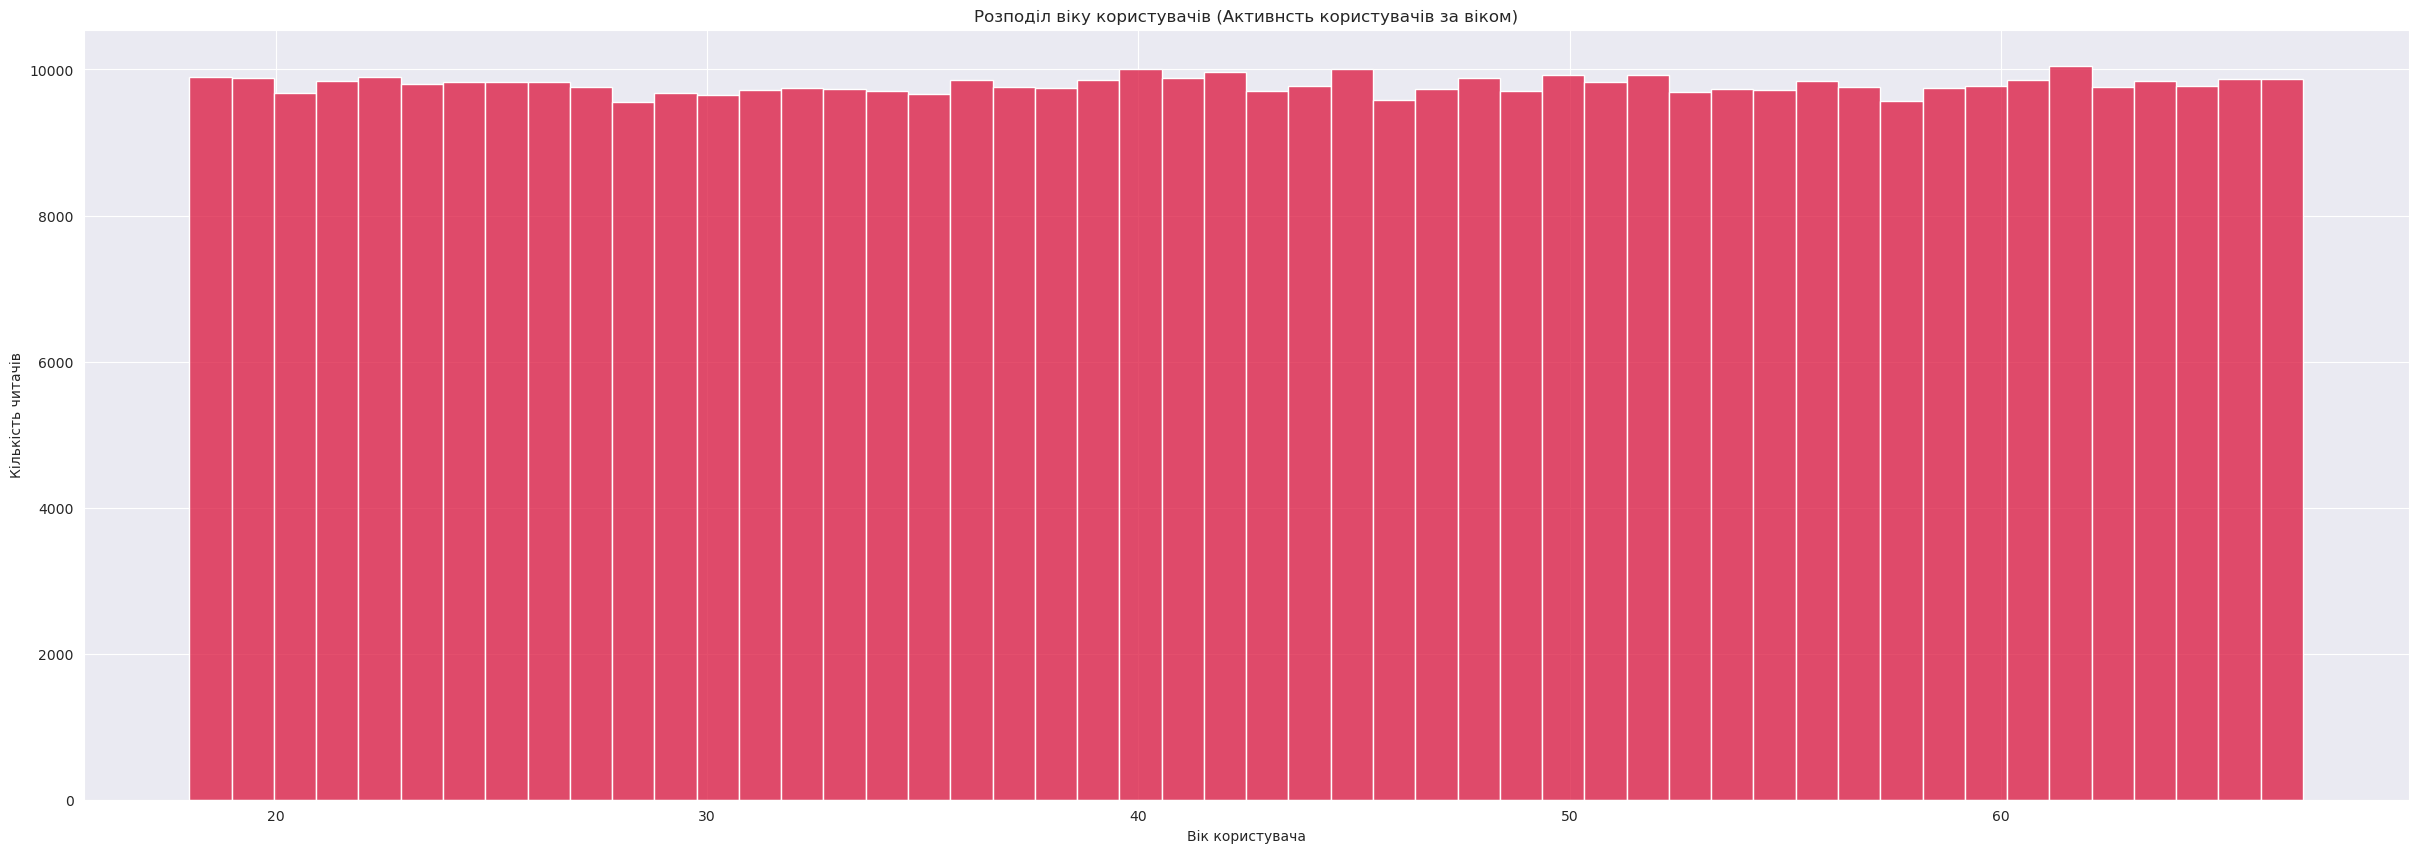

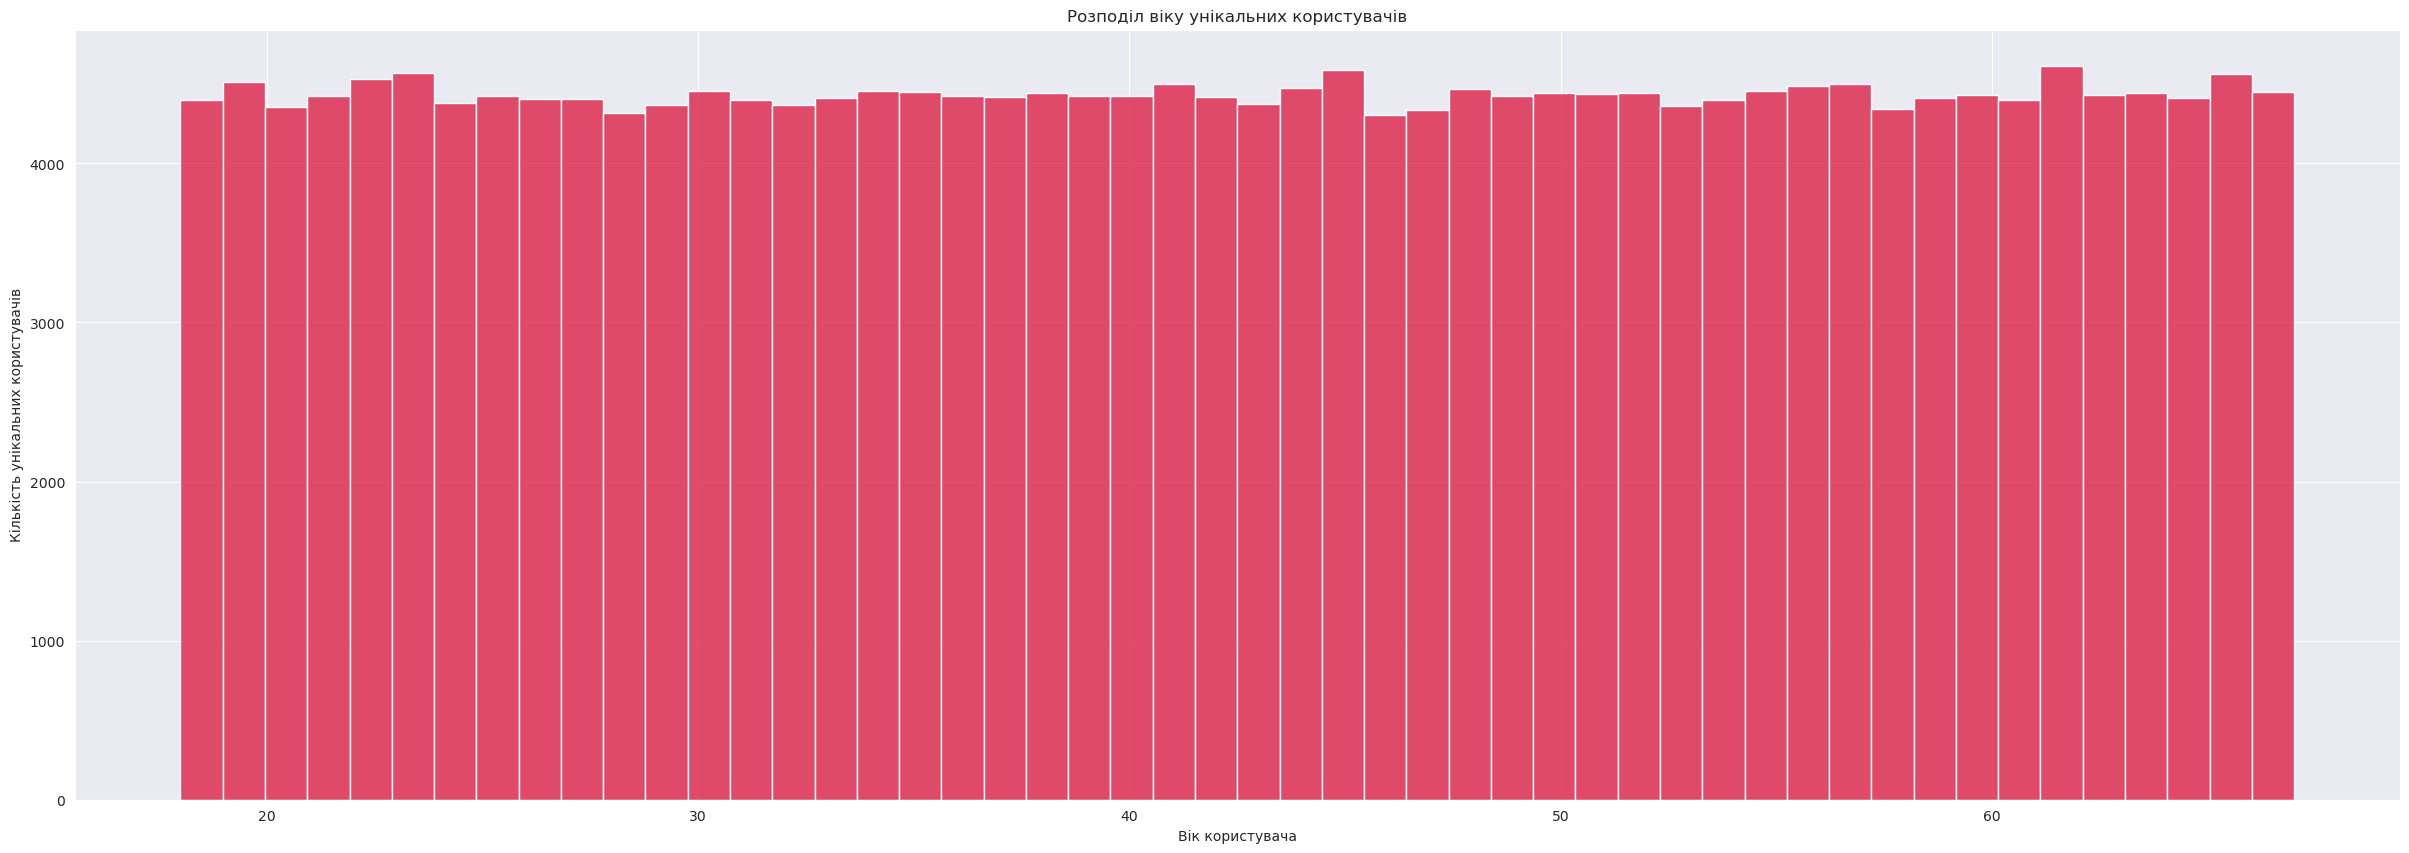

In [25]:
age_distribution(df_cleaned)
age_distribution(df_cleaned, unique=True)

Here we see that the  looks uniform, which is quite surprising. Also some users are changing their age during this time. Let`s look closer


In [26]:
df_copy = df_cleaned.copy()
df_copy["previous_age"] = df_copy.groupby("user_id")["user_properties_age"].shift(1)
users_with_age_changes = df_copy[df_copy["user_properties_age"] != df_copy["previous_age"]].dropna()
users_with_changes_ids = users_with_age_changes["user_id"].unique()
users_with_age_changes = df_copy[df_copy["user_id"].isin(users_with_changes_ids)]
users_without_age_changes = df_copy[~df_copy["user_id"].isin(users_with_changes_ids)]

# users_with_age_changes.drop_duplicates(subset="user_id")
users_with_age_changes

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic,previous_age
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown,NaN
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship,NaN
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science,NaN
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity,NaN
6,6,8Z5FY1Q5,2024-06-03 13:09:14,United States,summary_last_page,pADqpzgc48WYGTGYQLfn,audio,19.0,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...
489611,523131,KV7XABCL,2024-05-09 02:26:42,United States,summary_last_page,5de53a7711e54ad6881c,audio,23.0,Empowerment,38.0
489614,523136,K5SZLO4G,2024-05-13 11:35:55,United States,summary_start,f5a4fb9dfd3e420aaa21,audio,31.0,Mind Enhancement,56.0
489615,523137,AGFW7EES,2024-06-04 05:17:29,United States,summary_start,J6fy6QCxXDjJg74r8xmh,audio,50.0,Survival,37.0
489616,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition,49.0


In [27]:
df_cleaned[df_cleaned["user_id"].isin(users_with_changes_ids)].groupby("user_id")["user_properties_age"].agg(list).head(10)

user_id
000EASFZ    [31.0, 25.0, 28.0, 64.0, 54.0, 30.0, 58.0, 61....
000L9LNJ     [48.0, 19.0, 51.0, 53.0, 22.0, 39.0, 44.0, 63.0]
0015JC17                                   [64.0, 38.0, 67.0]
001FV4T5                 [24.0, 64.0, 21.0, 42.0, 52.0, 39.0]
001LXFJB    [45.0, 55.0, 28.0, 55.0, 52.0, 45.0, 24.0, 25....
001M897V                                   [49.0, 55.0, 61.0]
001RB3KN                             [54.0, 54.0, 66.0, 56.0]
002JQD3M                                         [42.0, 44.0]
0030EYEB                             [26.0, 34.0, 25.0, 51.0]
00473AO2                                         [23.0, 48.0]
Name: user_properties_age, dtype: object

Here we can see that some users change their age so randomly. There may be some problems during data recording or a technical failure
Let`s look how change age distributions in each subset

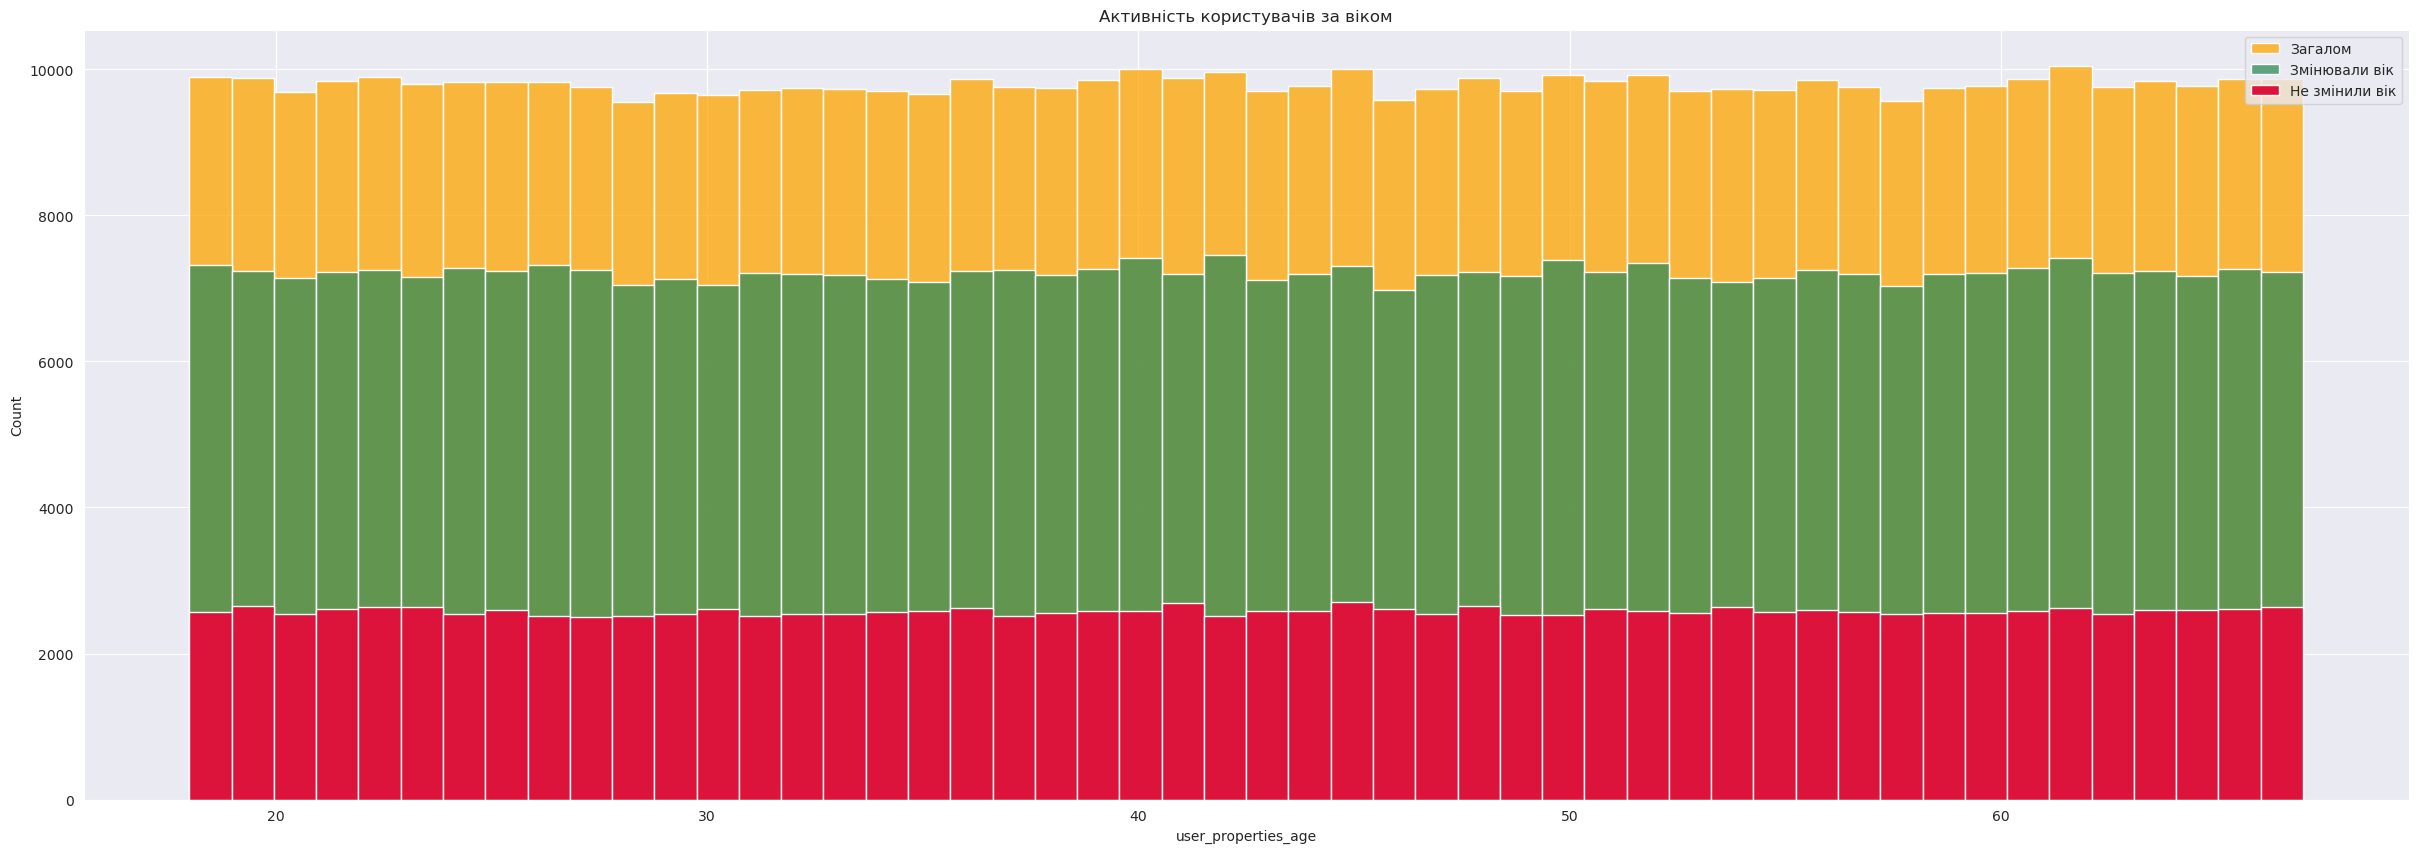

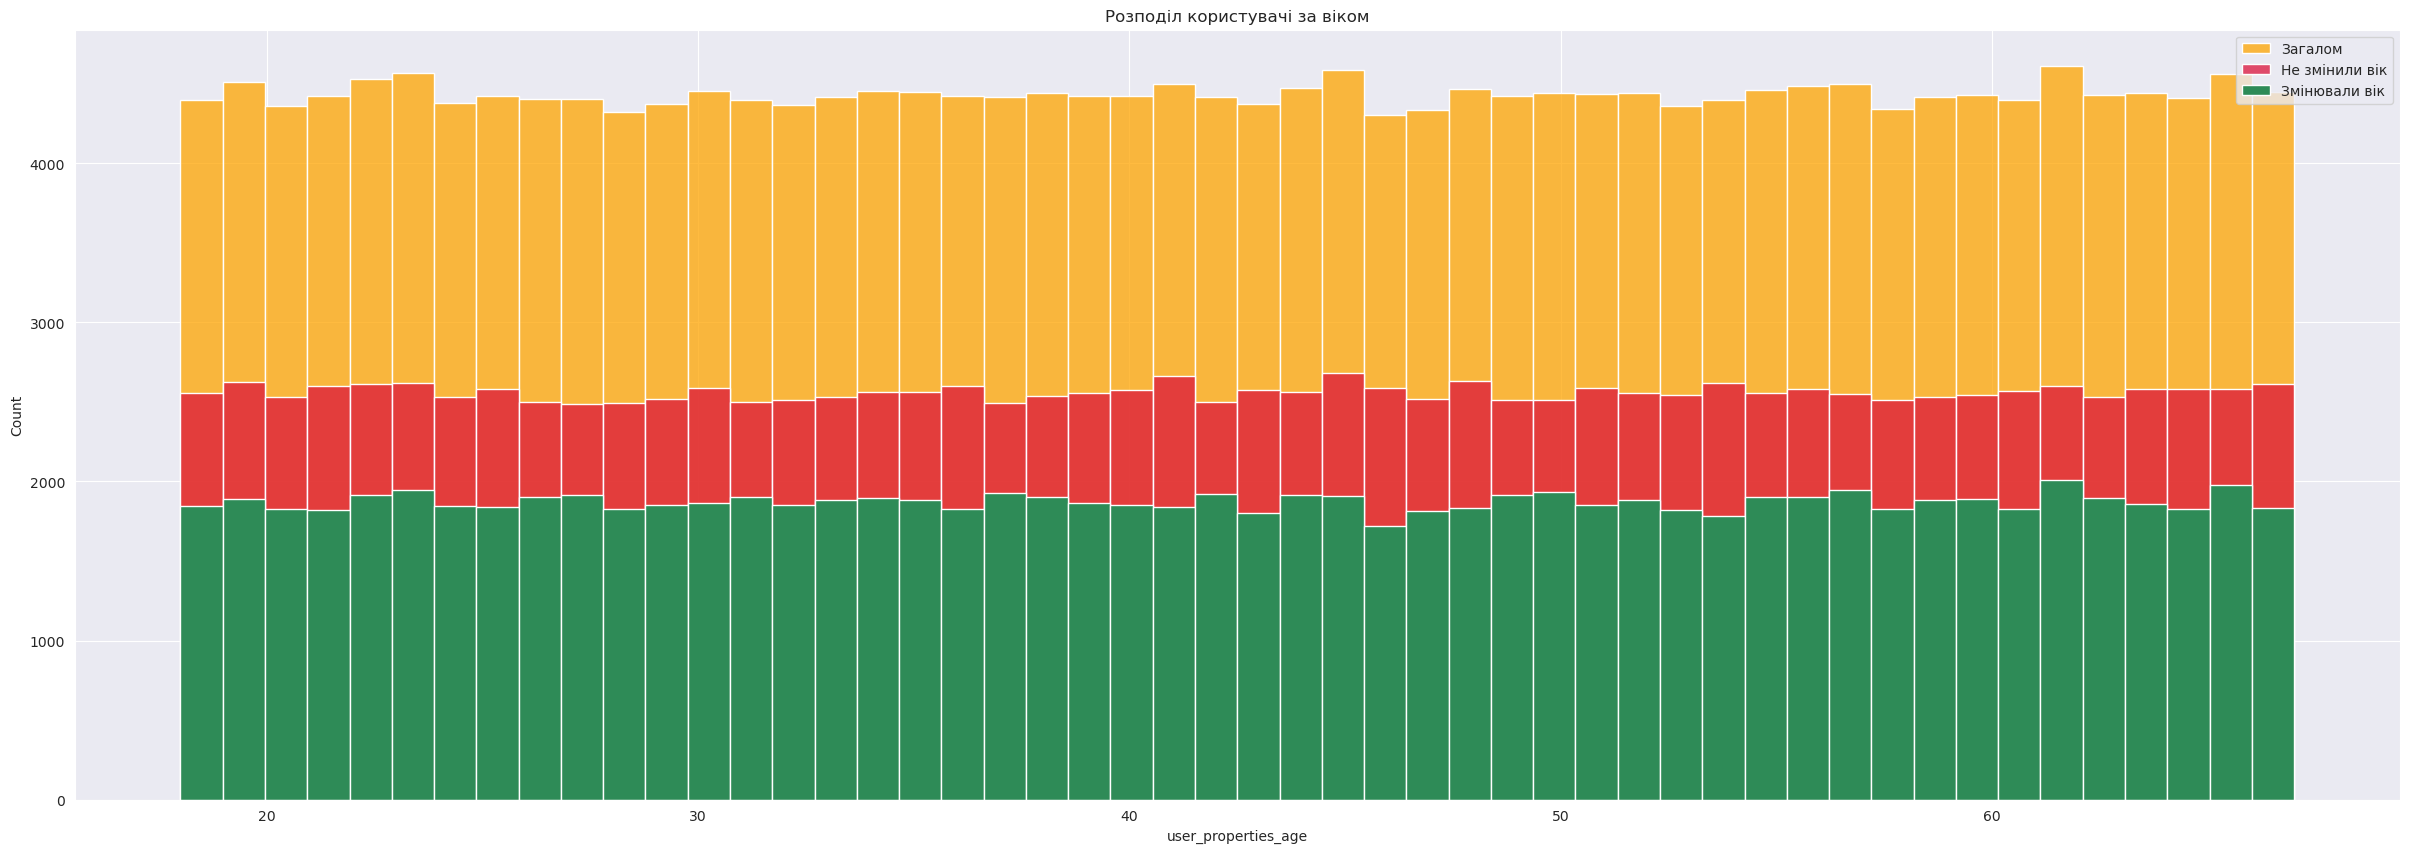

In [28]:
age_distribution_separately(df_cleaned, users_without_age_changes, users_with_age_changes)
age_distribution_separately(df_cleaned, users_without_age_changes, users_with_age_changes, unique=True)

As you can see from these graphs, the distribution remains uniform even if you exclude users who have changed their age. We can also see that although there are fewer users who change their age, they generate significantly more activity. It looks like the data was generated using a uniform distribution or it is a very strange technical glitch.

Such age-changing users could be considered a common error and removed for further study. But they make up the majority of the data and generate about 2/3 of the activity. Also, their removal almost does not change the main indicators of the distributions (more on this below). Therefore, at this stage, I decided to divide the data into: General, Changing age, Not changing age. I will work with them separately and study them according to a similar structure, because except for the age change, they are almost identical


#### General Data

##### Distributions

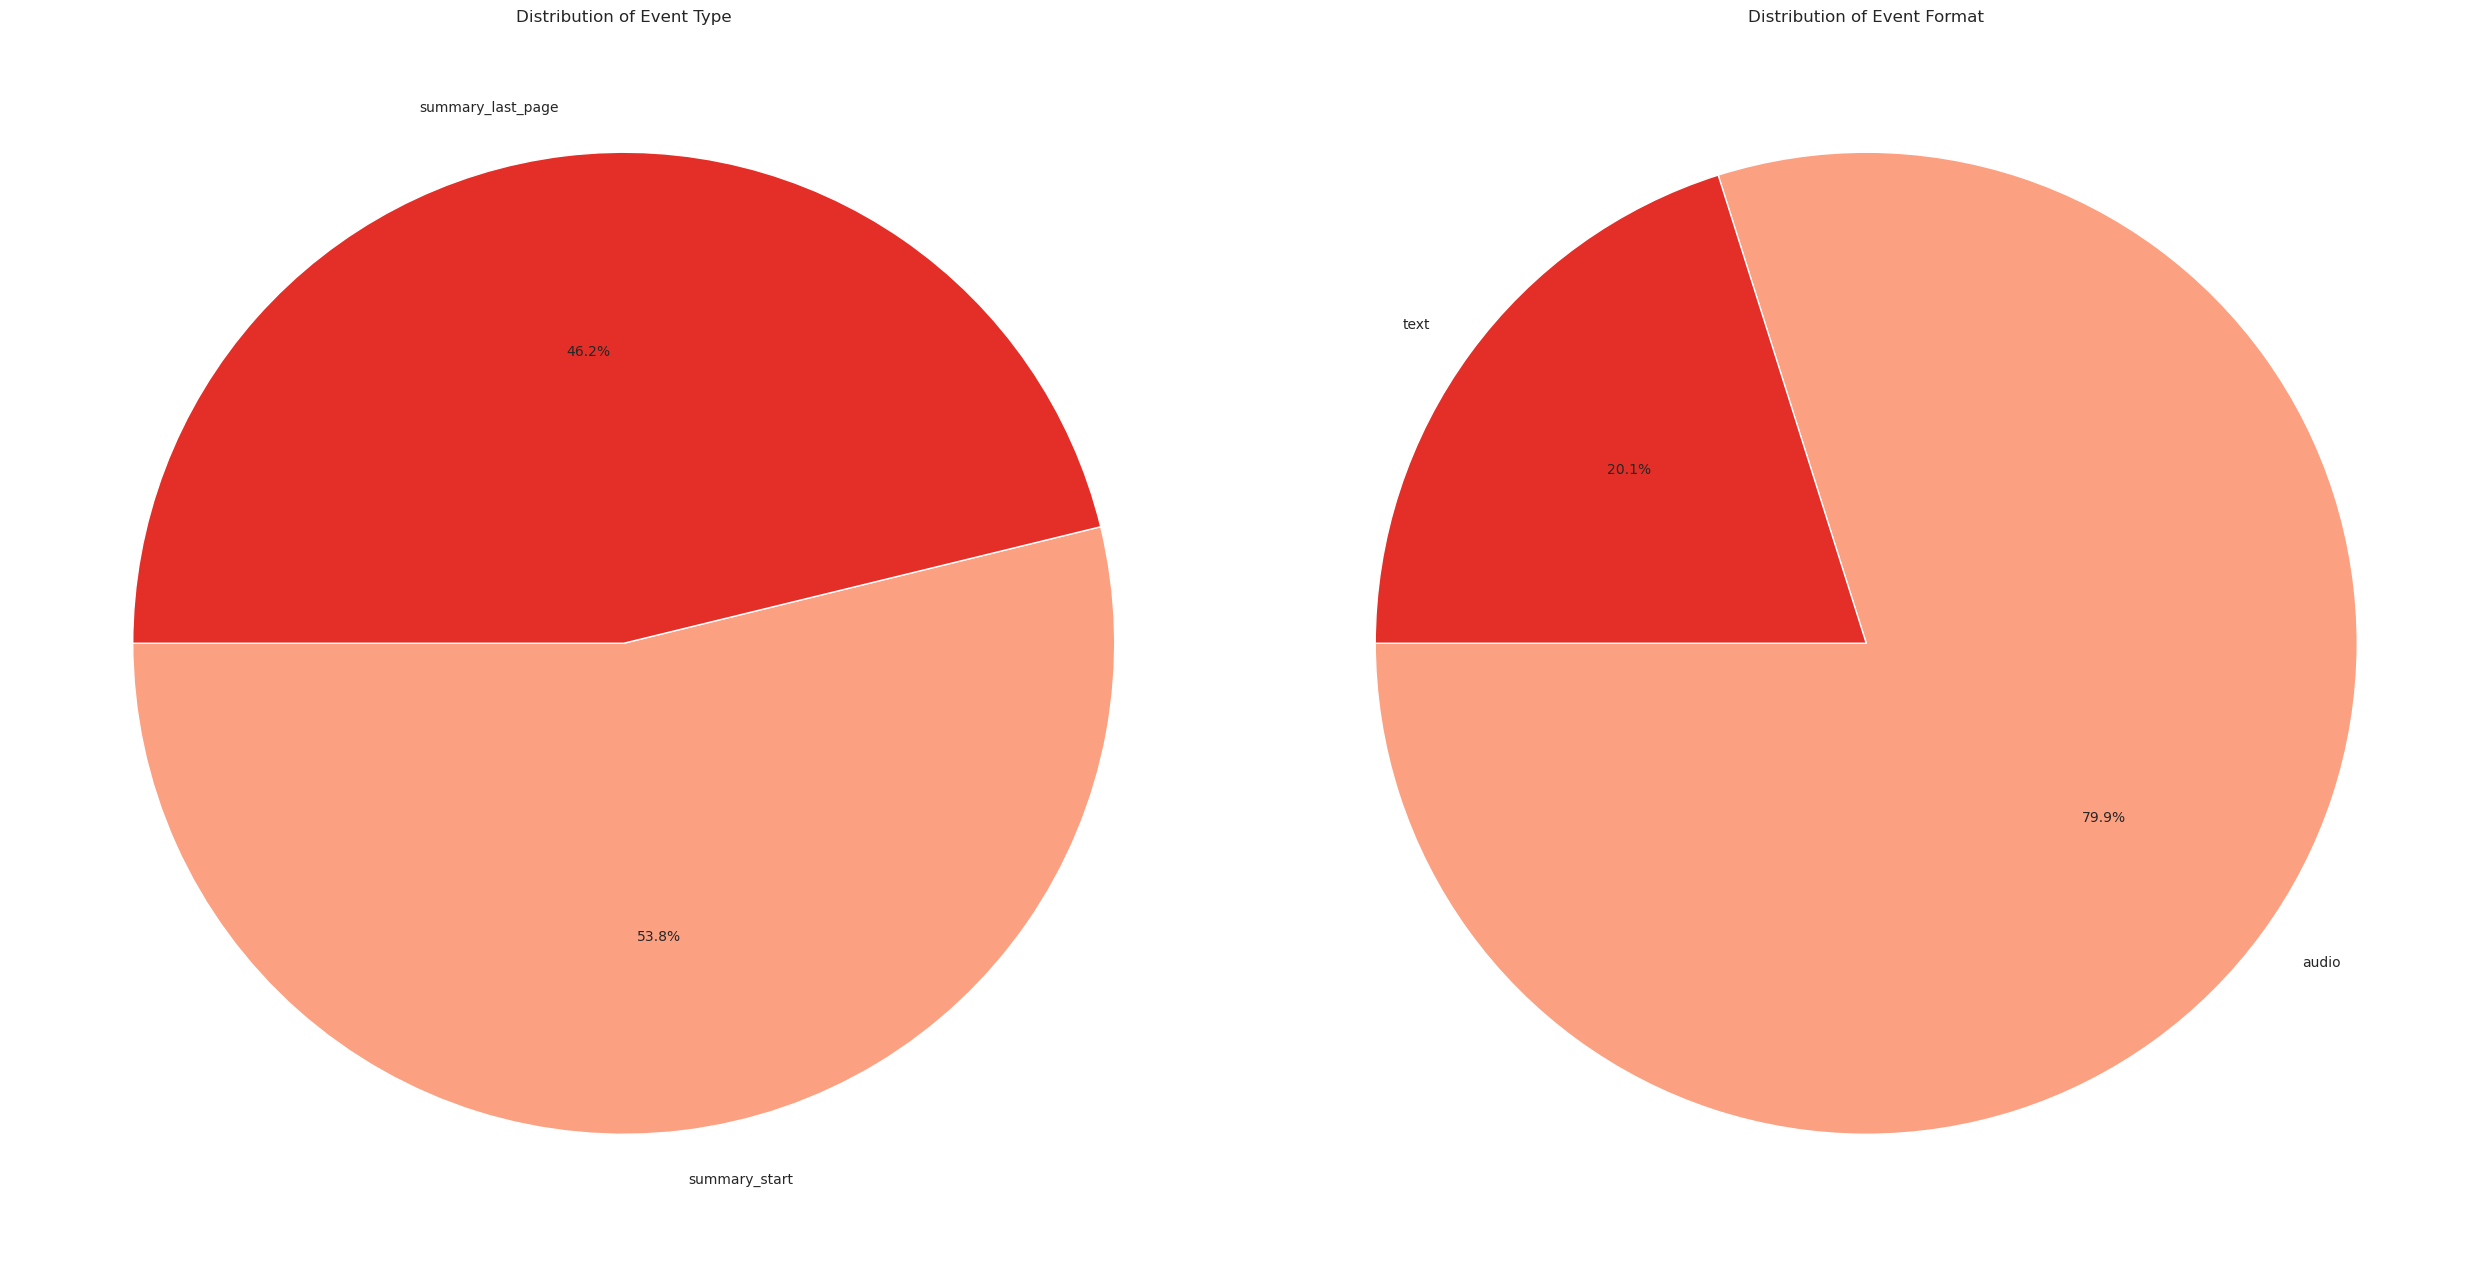

In [29]:
plot_event_distributions(df_cleaned.subset)

Unique user-book pairs: 470919
Books fully tracked (started and completed): 15009
Total books started: 263483
Estimated completion rate: 5.70%
Records with 'summary_last_page' but no 'summary_start': 210926
Users with 'summary_last_page': 126275
Users with 'summary_start': 161882
Percentage of users with 'summary_last_page' but no 'summary_start': -28.20%
Unique users with only 'summary_last_page': 59768


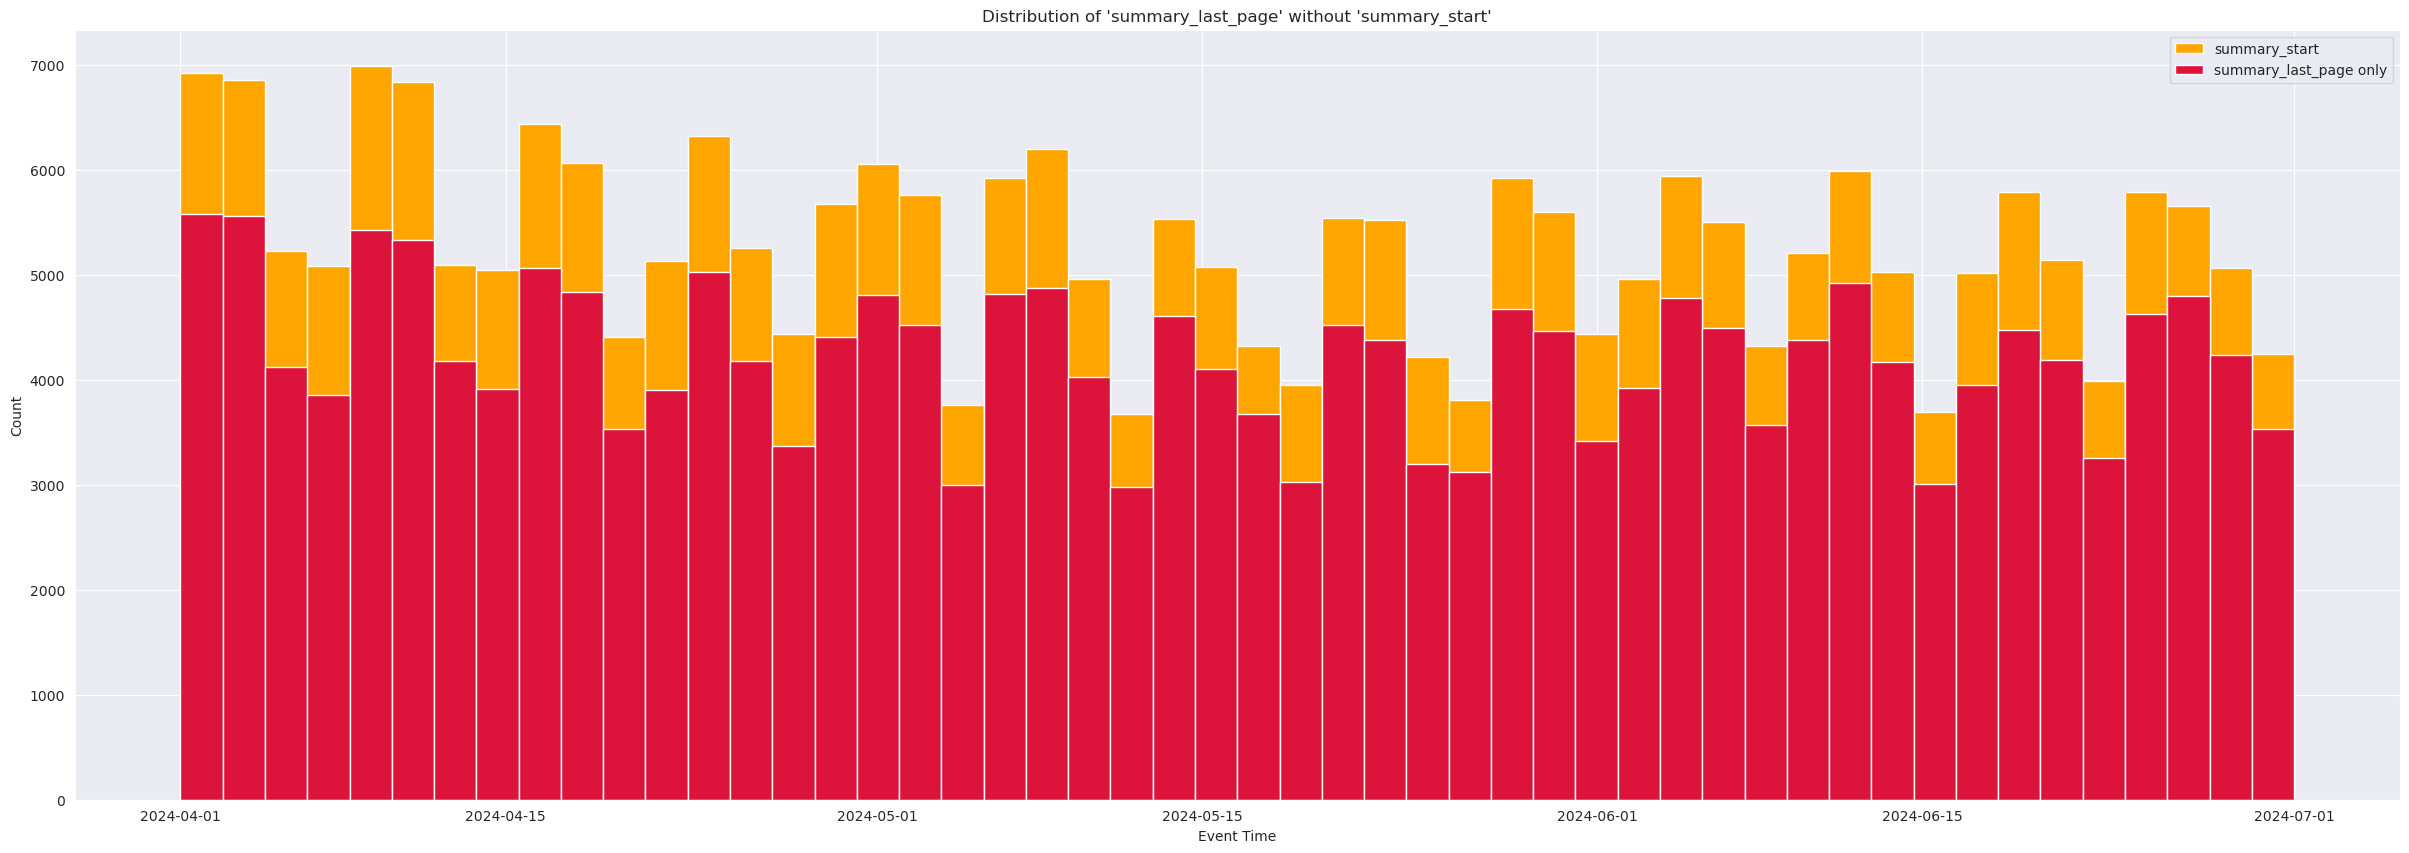

In [72]:
analyze_book_completion(merged_df)

Here we can see that most users ree

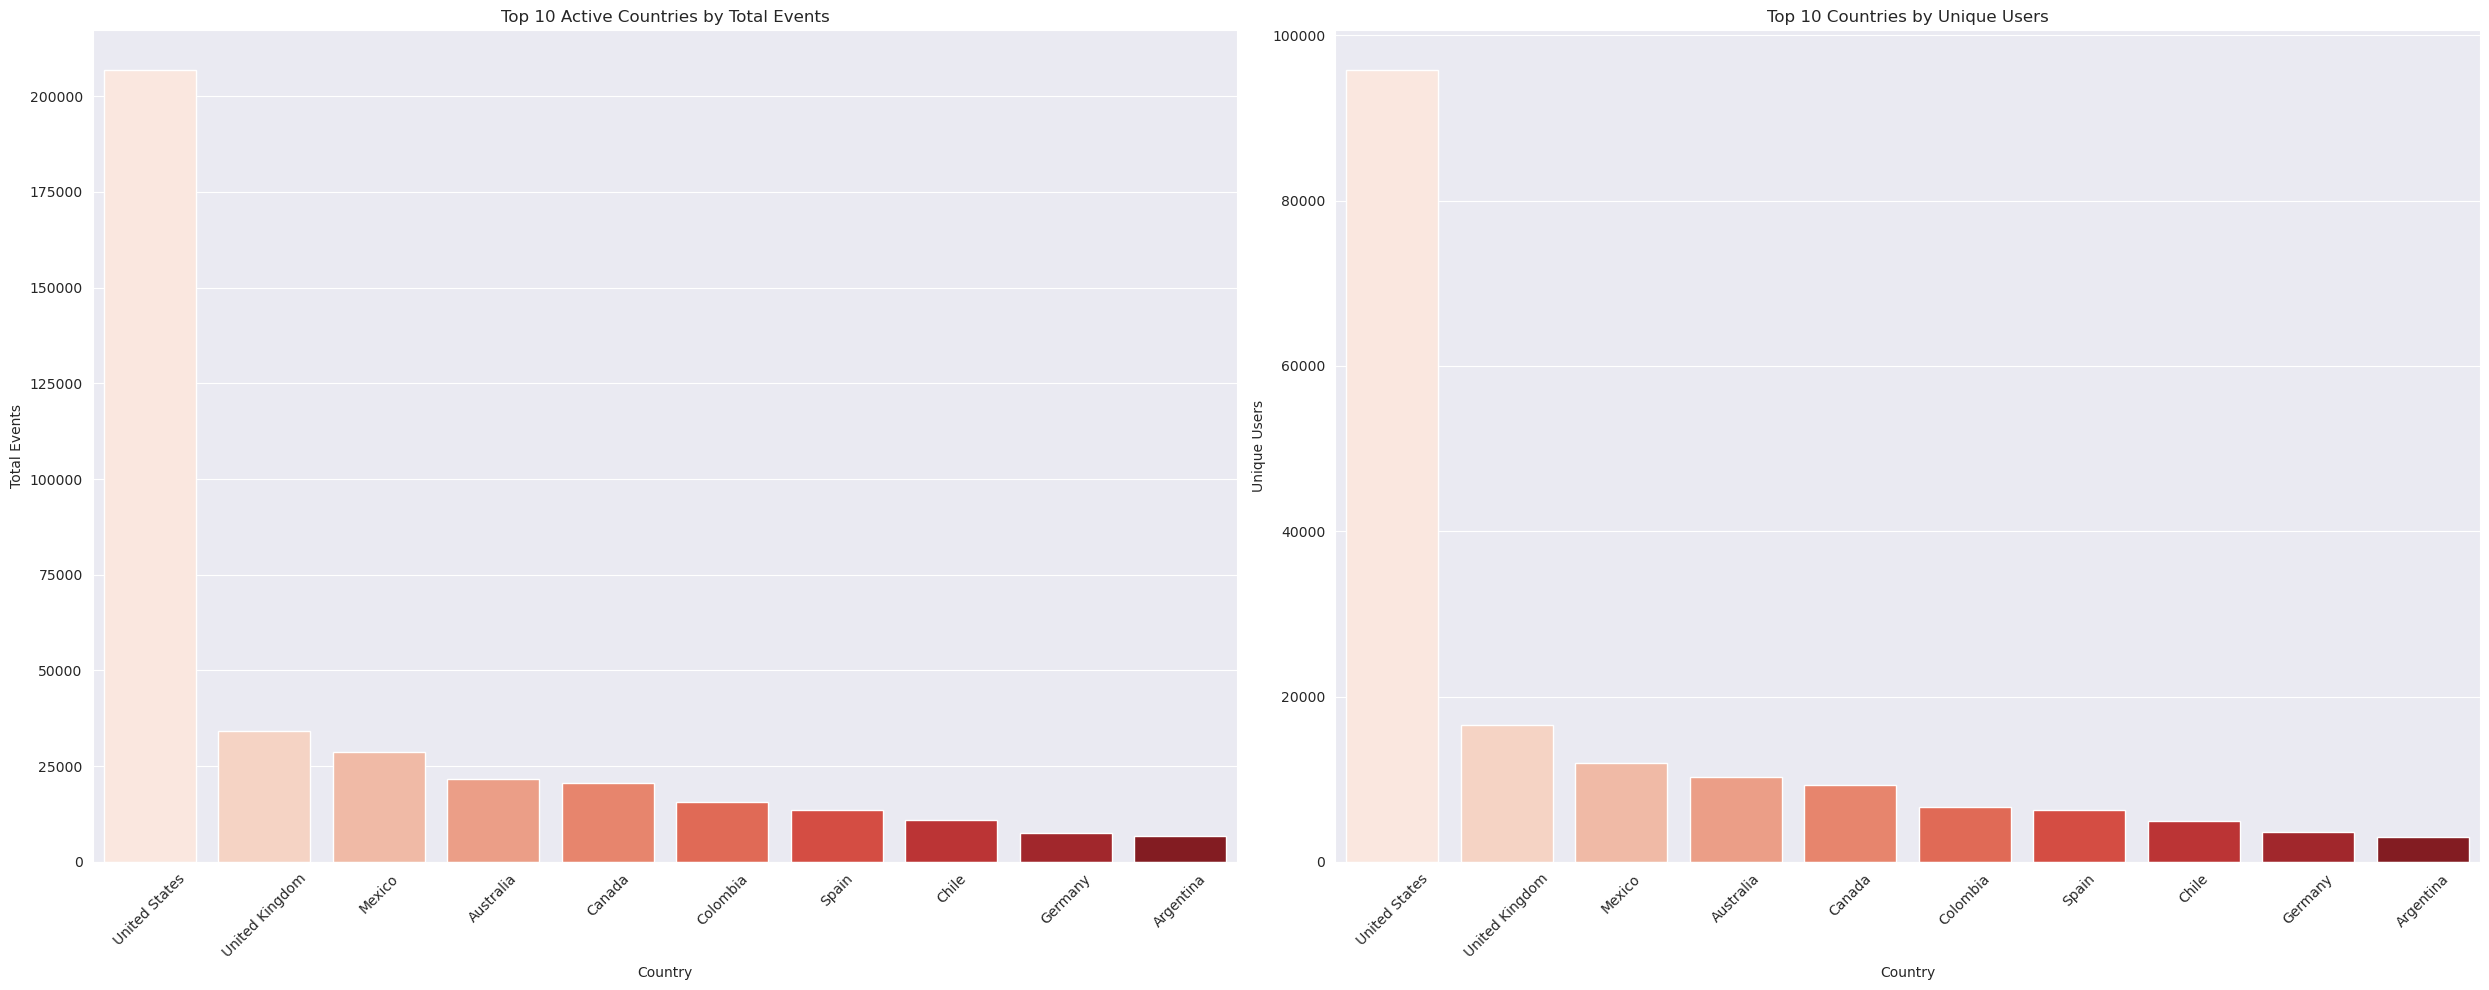

In [76]:
plot_country_activity(df_cleaned)

#### Changing age data

#### No changing age data

##### Distributions

###### Event Type and Fromat

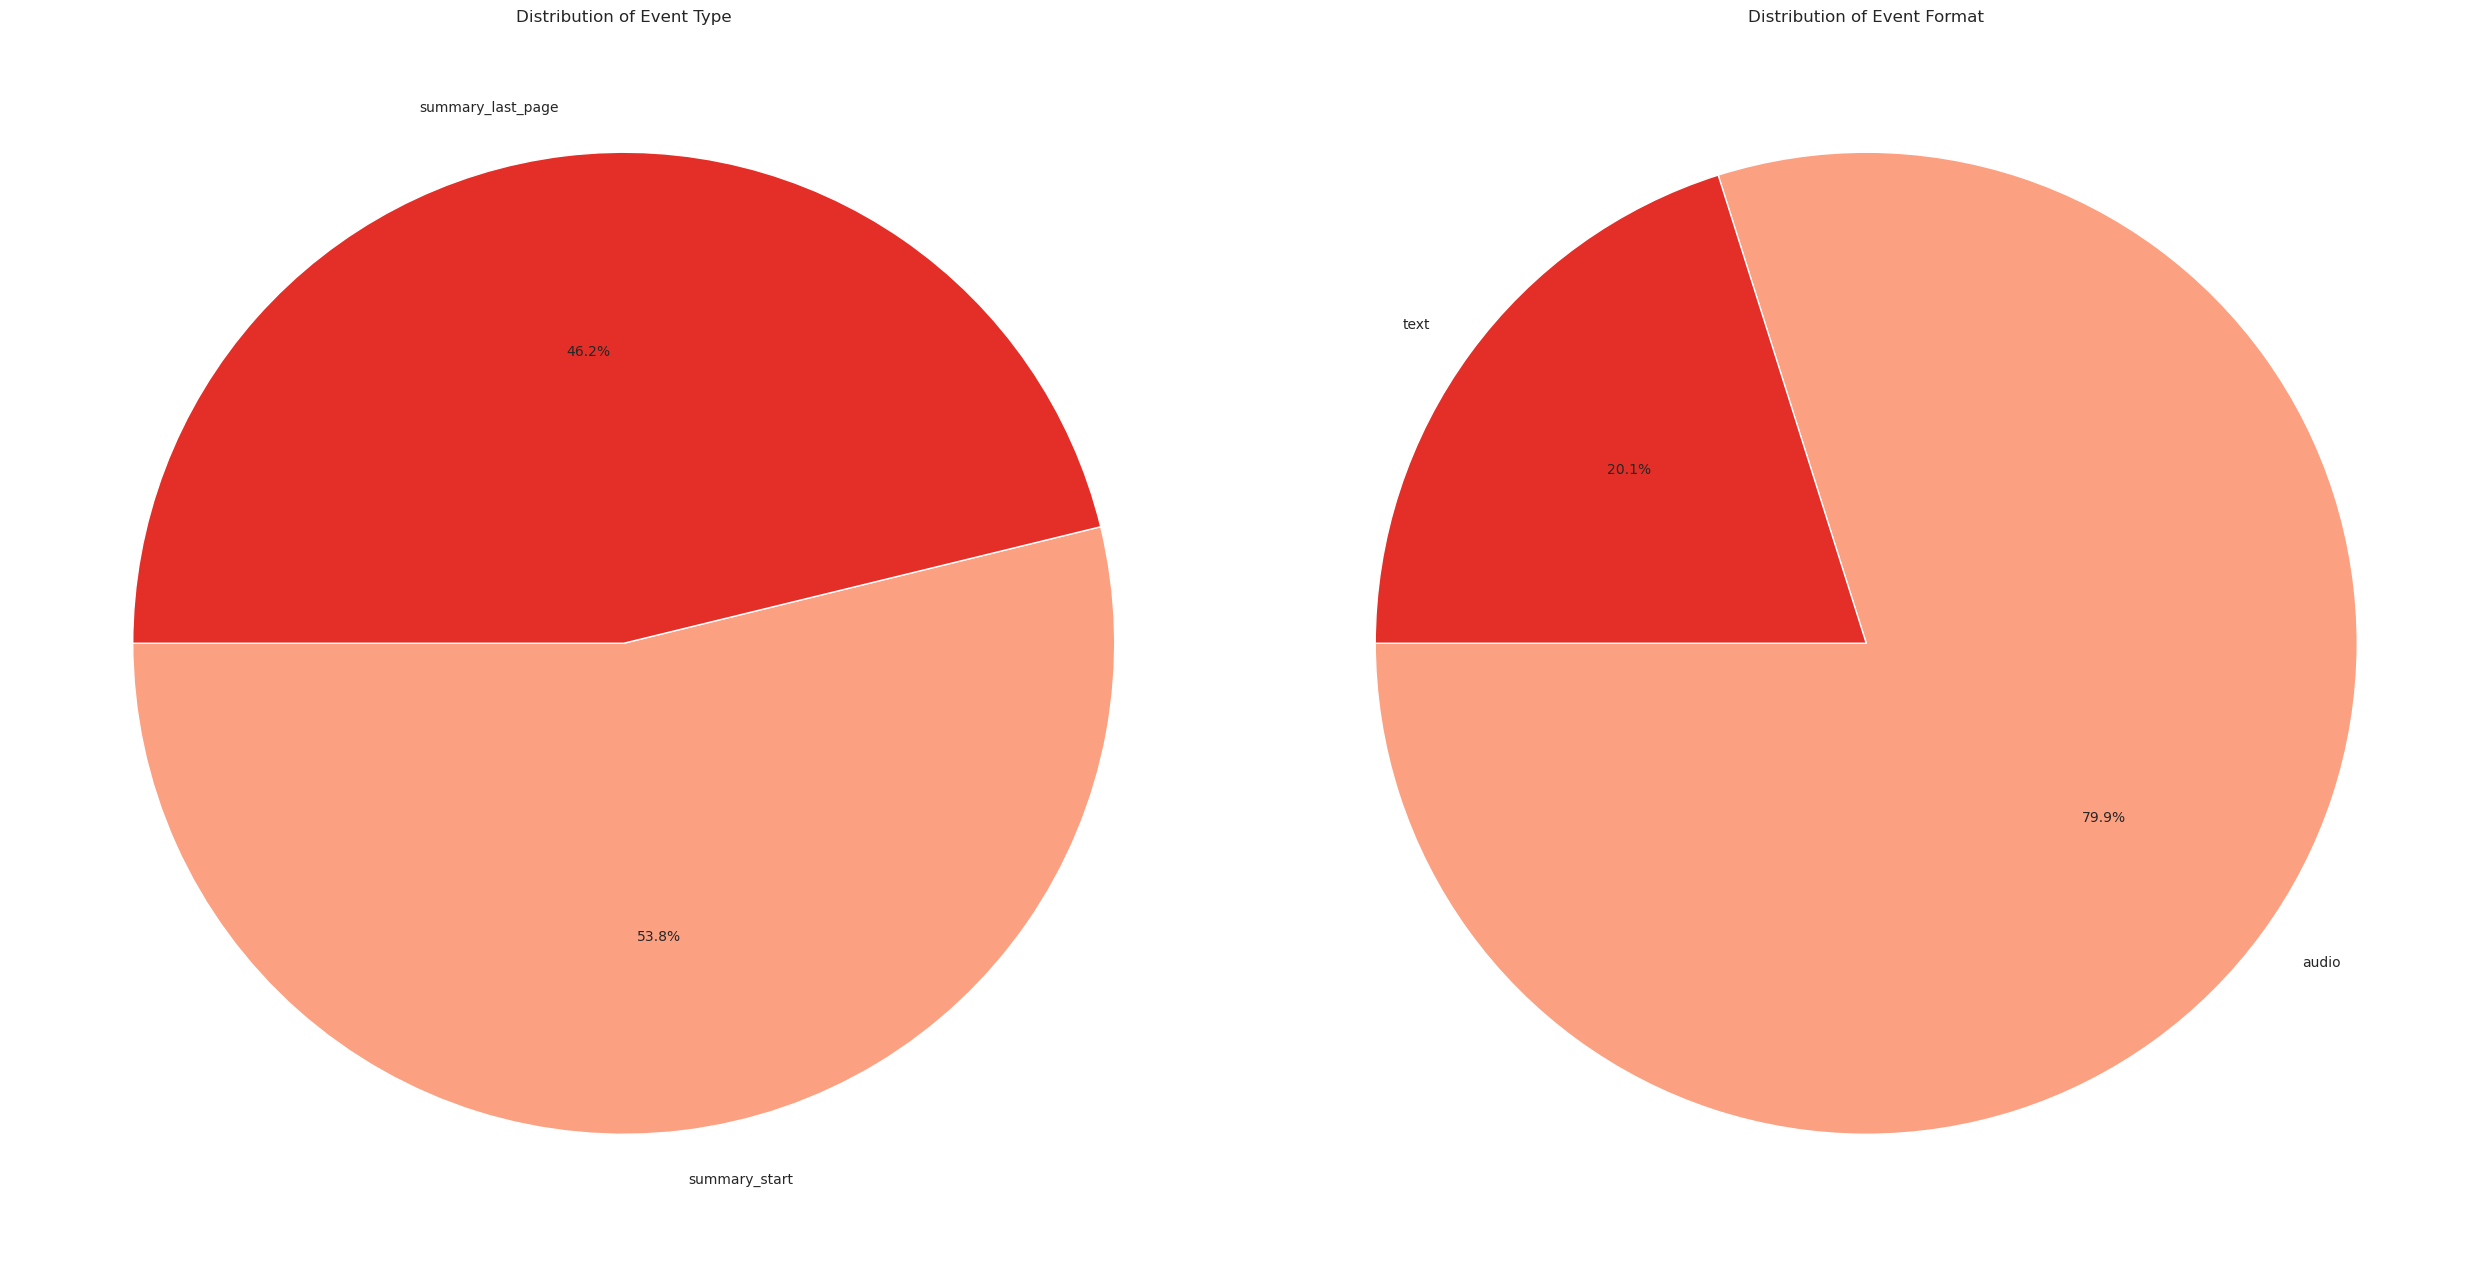

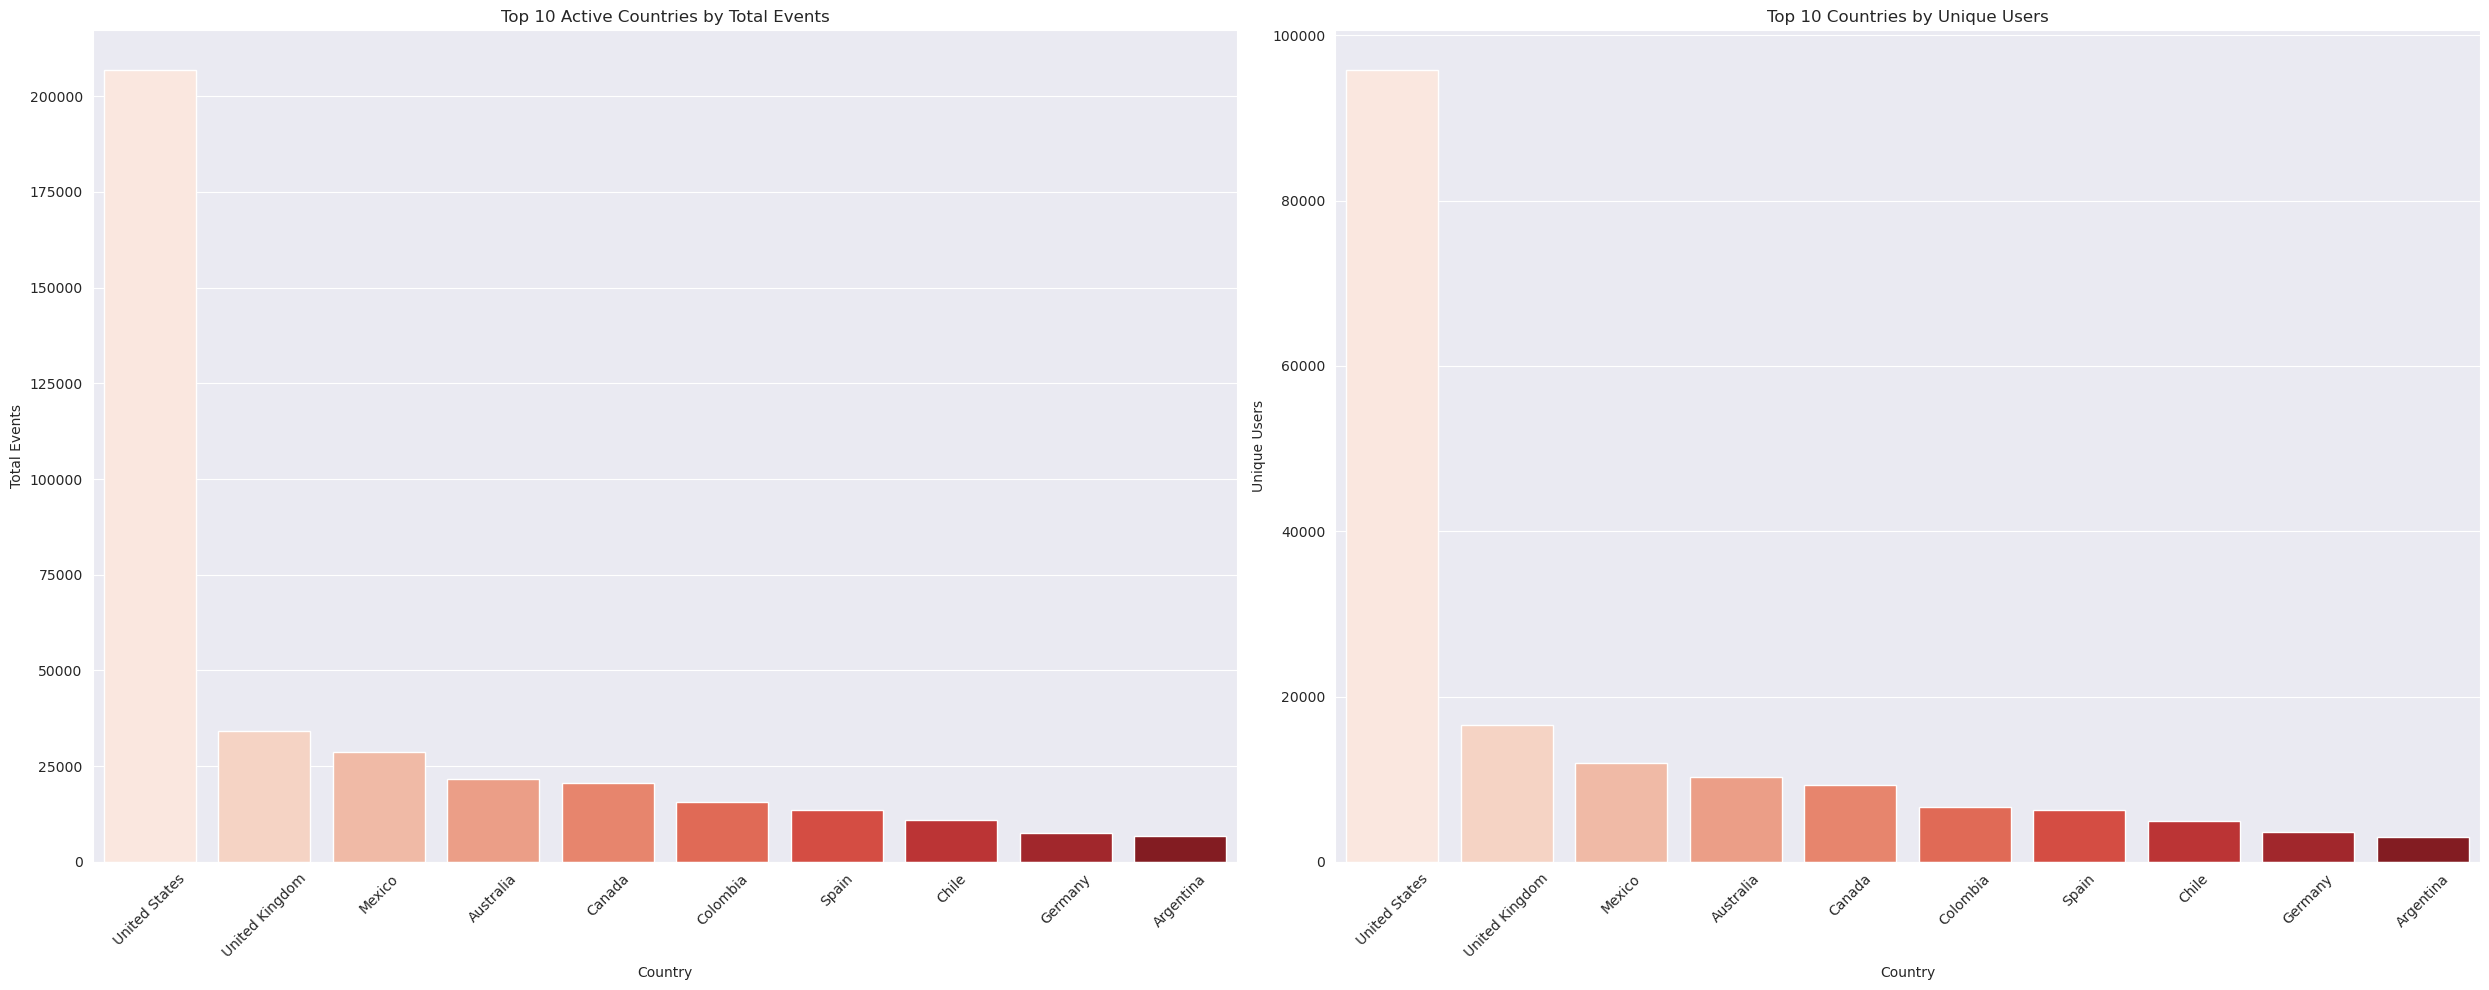

As we see the activity user distribution by user matches with country distribution between unique users

###### Time differences between reading summary

In [29]:
df_copy = merged_df.copy()
df_copy["event_time"] = pd.to_datetime(df_copy["event_time"], errors="coerce")
df_copy = df_copy.sort_values(by=["user_id", "event_time"])
df_copy["prev_event_time"] = df_copy.groupby("user_id")["event_time"].shift(1)
df_copy["time_diff"] = (df_copy["event_time"] - df_copy["prev_event_time"]).dt.total_seconds() / 3600

In [30]:
user_daily_reads = df_copy.groupby(["user_id", df_copy["event_time"].dt.date])["event_properties_book_id"].count().reset_index()
user_daily_reads.rename(columns={"event_properties_book_id": "daily_reads"}, inplace=True)

mean_reads = user_daily_reads["daily_reads"].mean()
std_reads = user_daily_reads["daily_reads"].std()
user_daily_reads["z_score"] = (user_daily_reads["daily_reads"] - mean_reads) / std_reads

In [31]:
outliers = user_daily_reads[user_daily_reads["daily_reads"] > 2]
outliers

,user_id,event_time,daily_reads,z_score
66,0030EYEB,2024-05-30,3,4.790614
70,004HJPZ9,2024-04-21,3,4.790614
100,008U1RZF,2024-04-14,3,4.790614
102,008U1RZF,2024-04-17,3,4.790614
137,00COSKYE,2024-06-30,3,4.790614
...,...,...,...,...
438419,ZZK7NXES,2024-05-13,3,4.790614
438423,ZZKTTDHY,2024-06-06,3,4.790614
438499,ZZQJXIDZ,2024-04-23,3,4.790614
438533,ZZT7UGNB,2024-05-25,3,4.790614


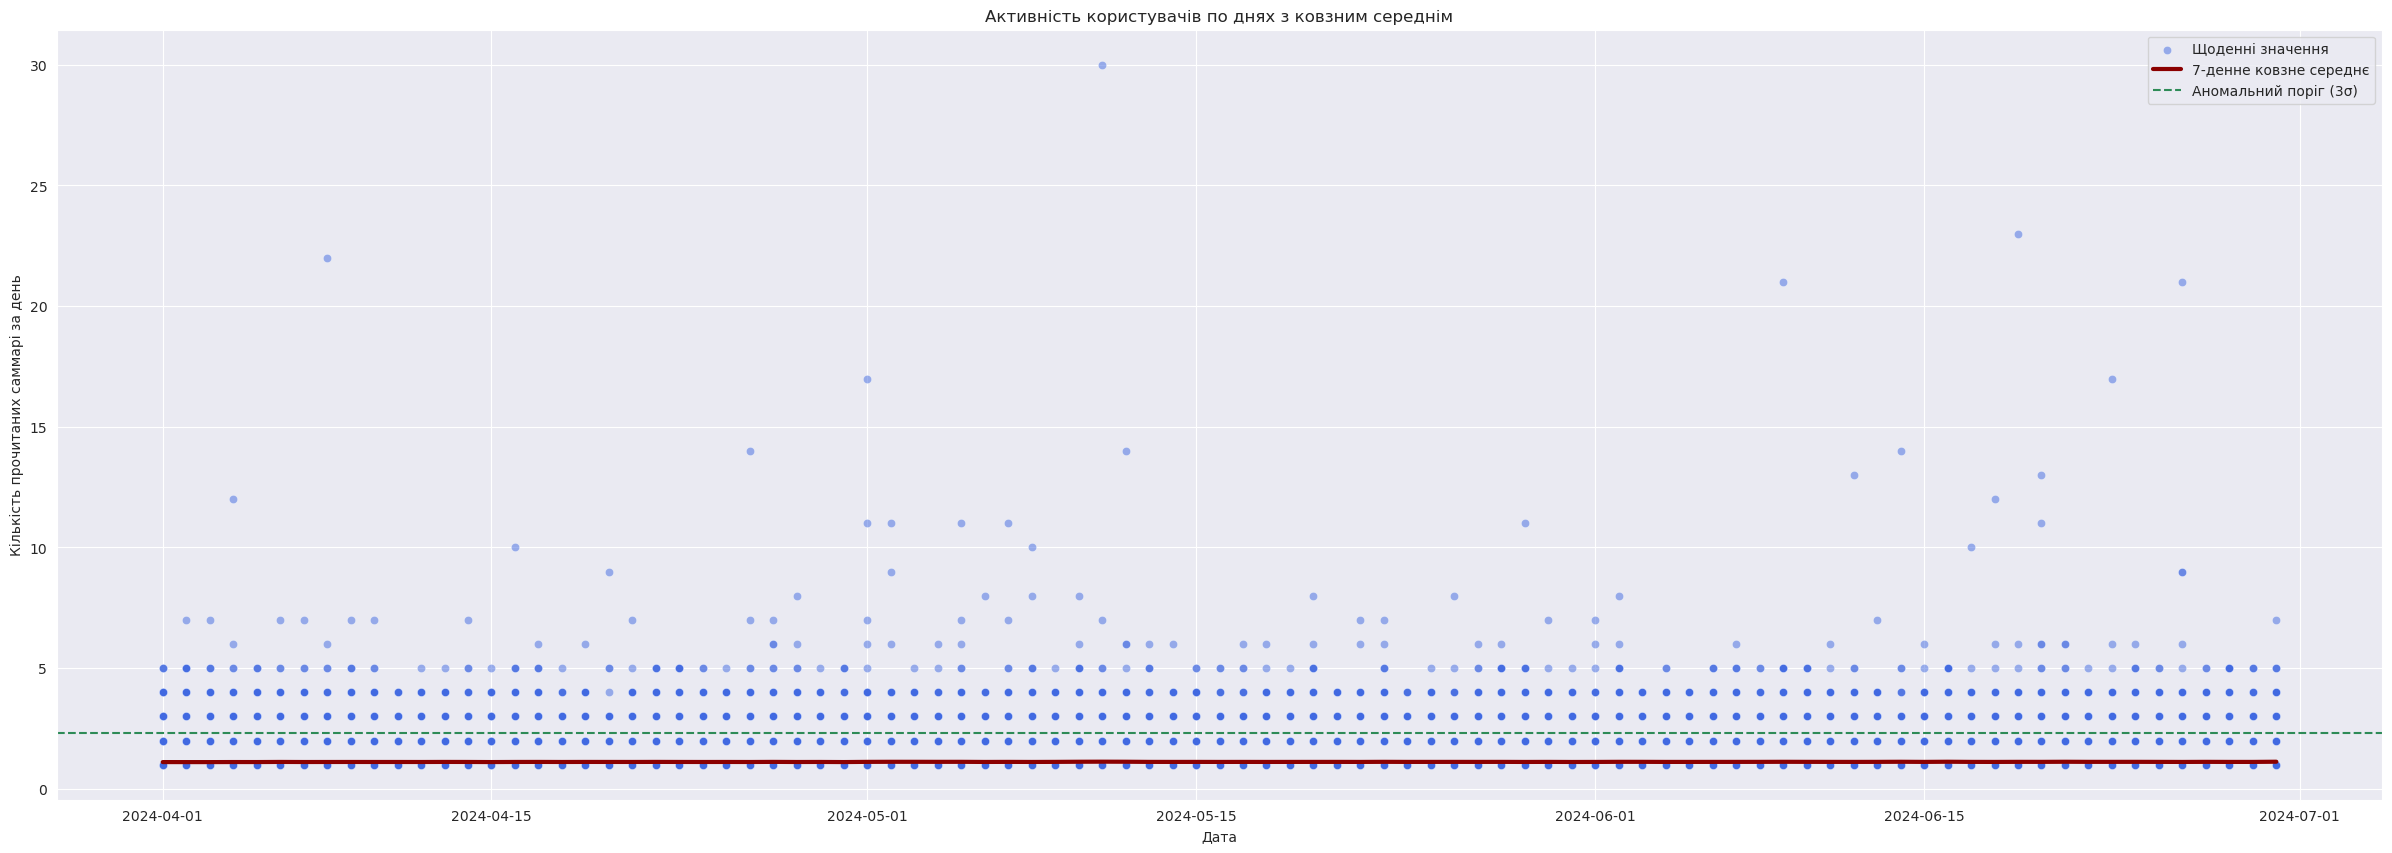

In [32]:
user_daily_reads["rolling_avg"] = user_daily_reads["daily_reads"].rolling(window=7).mean()

plt.figure(figsize=(30, 10))
sns.scatterplot(x=user_daily_reads["event_time"], y=user_daily_reads["daily_reads"], alpha=0.5, color='royalblue', label="Щоденні значення")
sns.lineplot(x=user_daily_reads["event_time"], y=user_daily_reads["rolling_avg"], color="darkred", linewidth=3, label="7-денне ковзне середнє")

plt.axhline(mean_reads + 3 * std_reads, color="seagreen", linestyle="dashed", label="Аномальний поріг (3σ)")
plt.xlabel("Дата")
plt.ylabel("Кількість прочитаних саммарі за день")
plt.title("Активність користувачів по днях з ковзним середнім")
plt.legend()
plt.show()

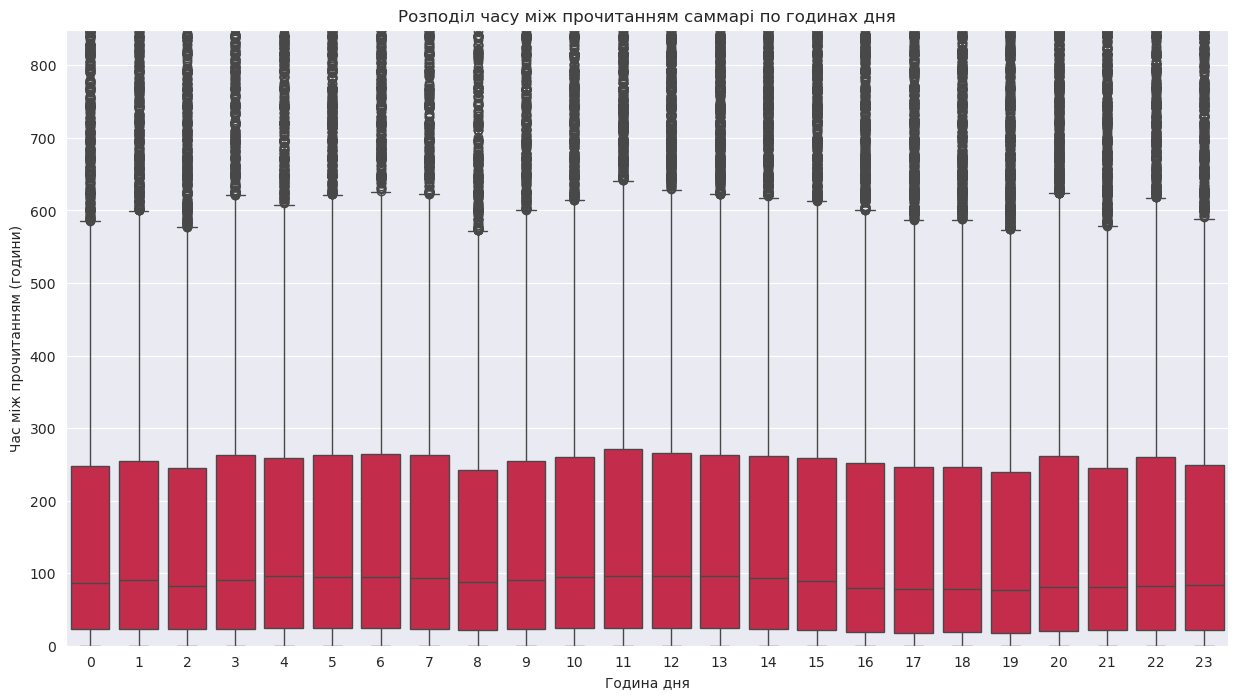

In [33]:
df_copy["event_time"] = pd.to_datetime(df_copy["event_time"], errors="coerce")
df_copy["hour"] = df_copy["event_time"].dt.hour
df_copy["time_diff"] = df_copy.groupby("user_id")["event_time"].diff().dt.total_seconds() / 3600

plt.figure(figsize=(15, 8))
sns.boxplot(x=df_copy["hour"], y=df_copy["time_diff"], color="crimson")
plt.ylim(0, df_copy["time_diff"].quantile(0.95))
plt.xlabel("Година дня")
plt.ylabel("Час між прочитанням (години)")
plt.title("Розподіл часу між прочитанням саммарі по годинах дня")
plt.show()

#### Other

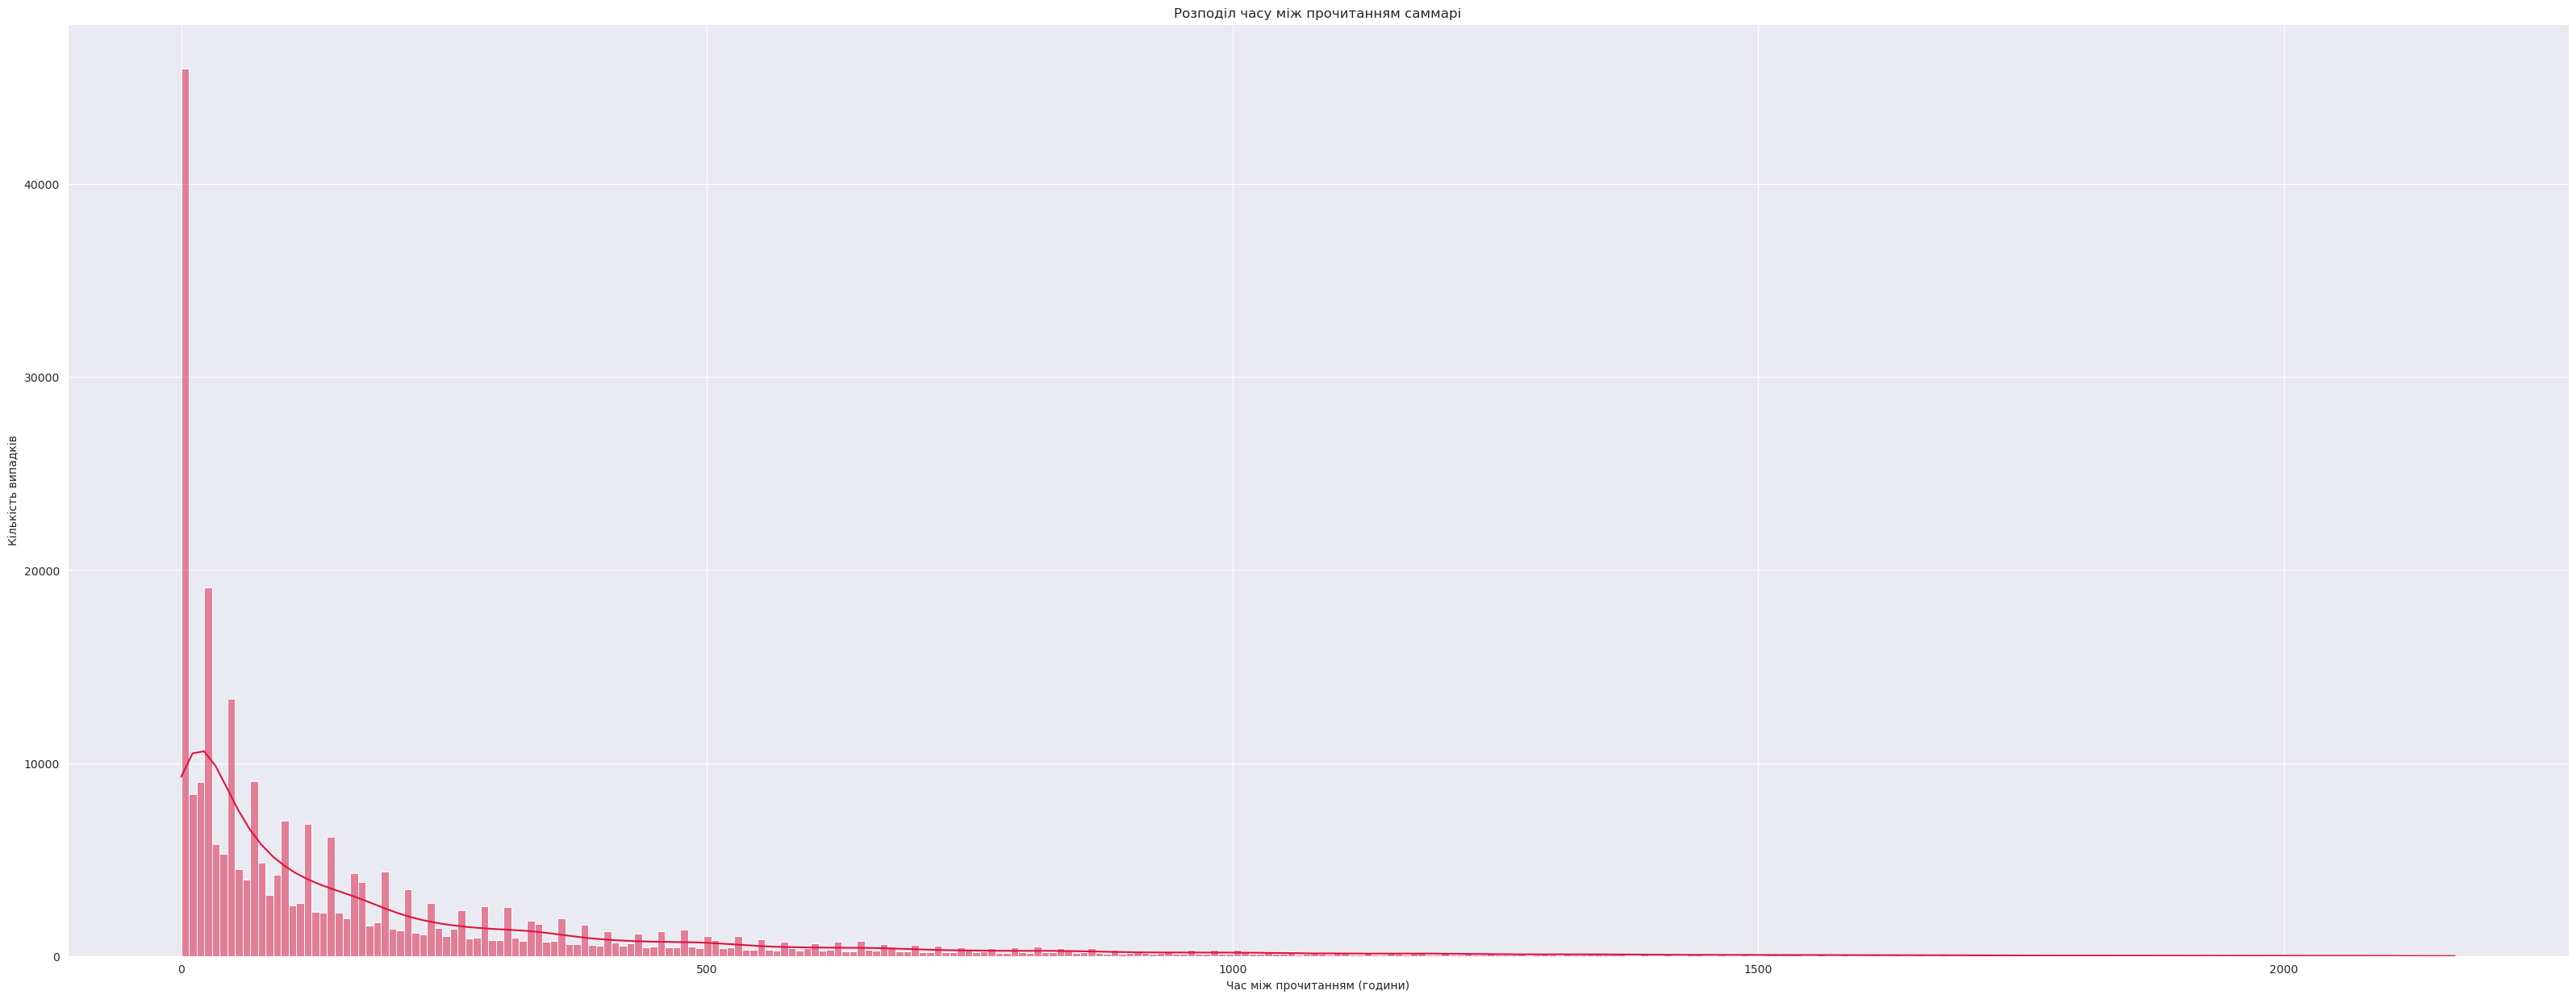

In [34]:
plt.figure(figsize=(40, 15))
sns.histplot(df_copy["time_diff"], kde=True, color="crimson")
plt.xlabel("Час між прочитанням (години)")
plt.ylabel("Кількість випадків")
plt.title("Розподіл часу між прочитанням саммарі")
plt.show()

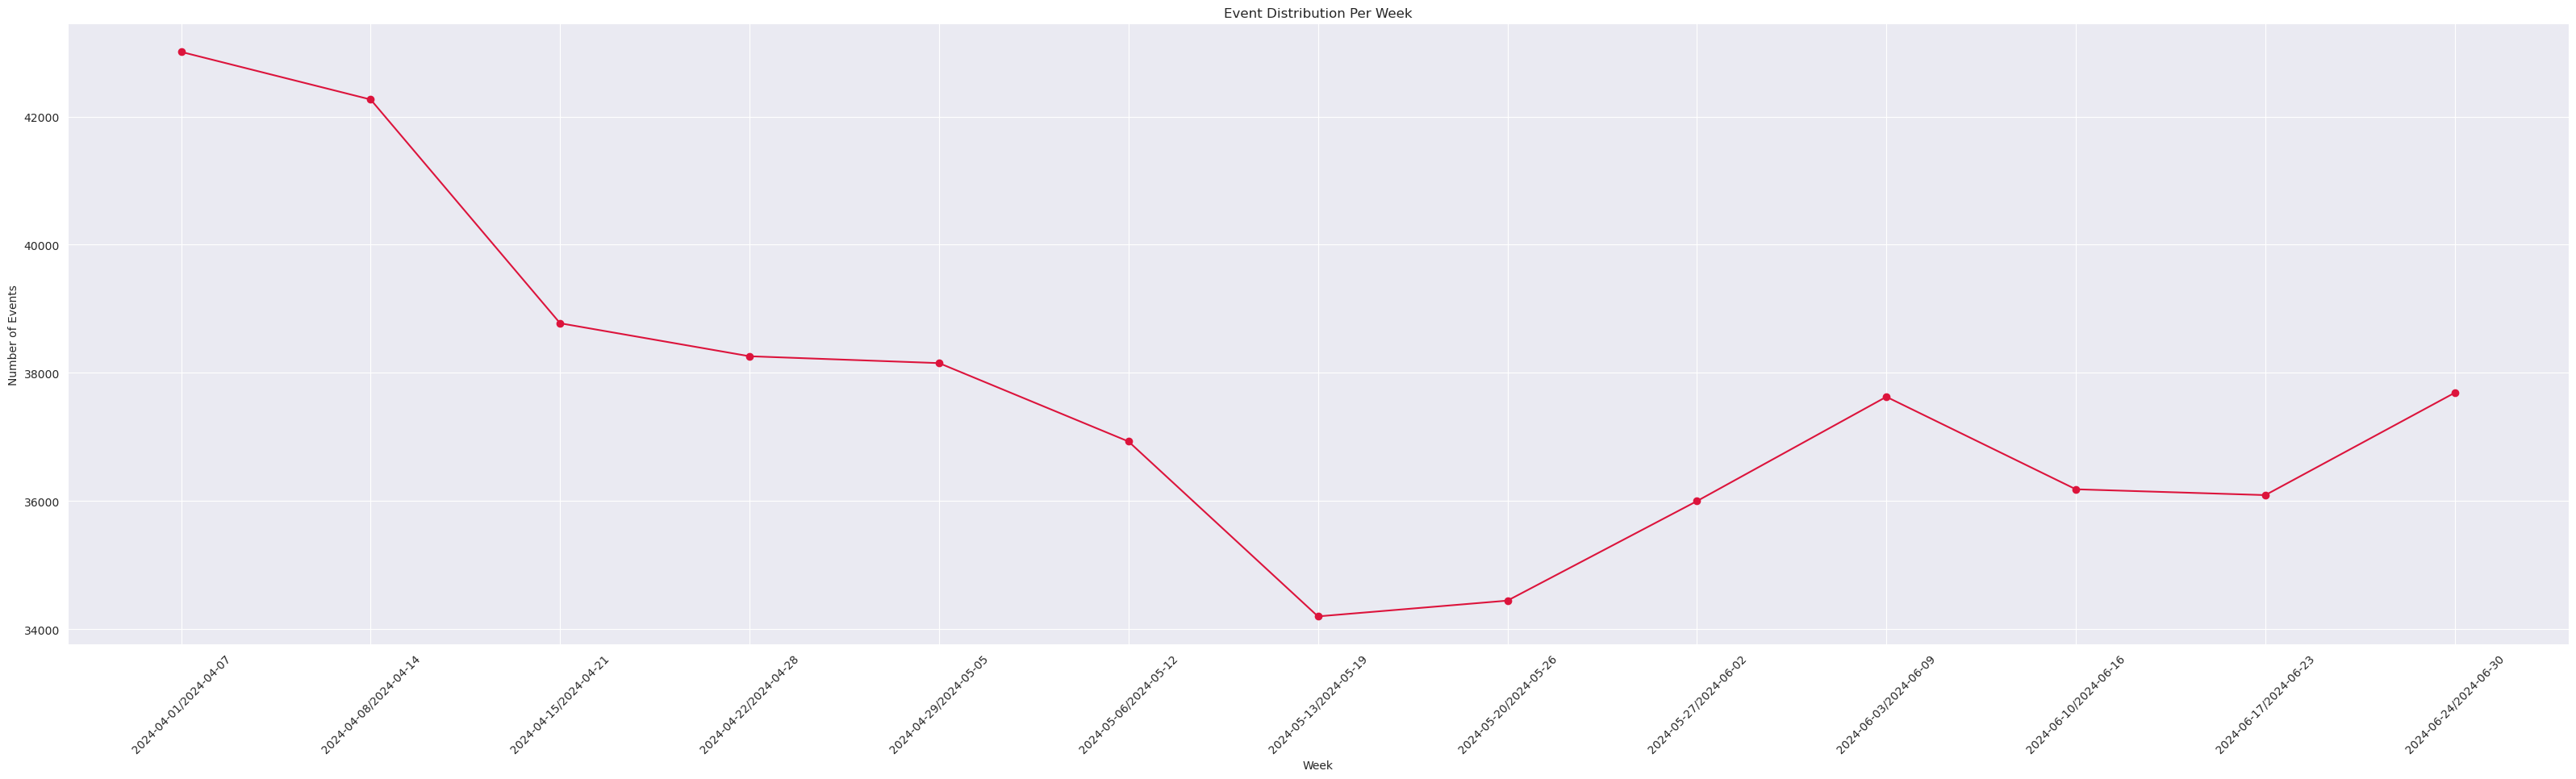

In [35]:
def event_per_week(df_name: pd.DataFrame) -> plt.Figure():

    df_name["event_time"] = pd.to_datetime(df_name["event_time"])
    event_counts_weekly = df_name["event_time"].dt.to_period("W").value_counts().sort_index()

    plt.figure(figsize=(40, 10))
    plt.plot(event_counts_weekly.index.astype(str), event_counts_weekly.values, marker="o", linestyle="-", color="crimson")
    plt.xlabel("Week")
    plt.ylabel("Number of Events")
    plt.title("Event Distribution Per Week")
    plt.xticks(rotation=45)
    plt.show()

event_per_week(df_cleaned)

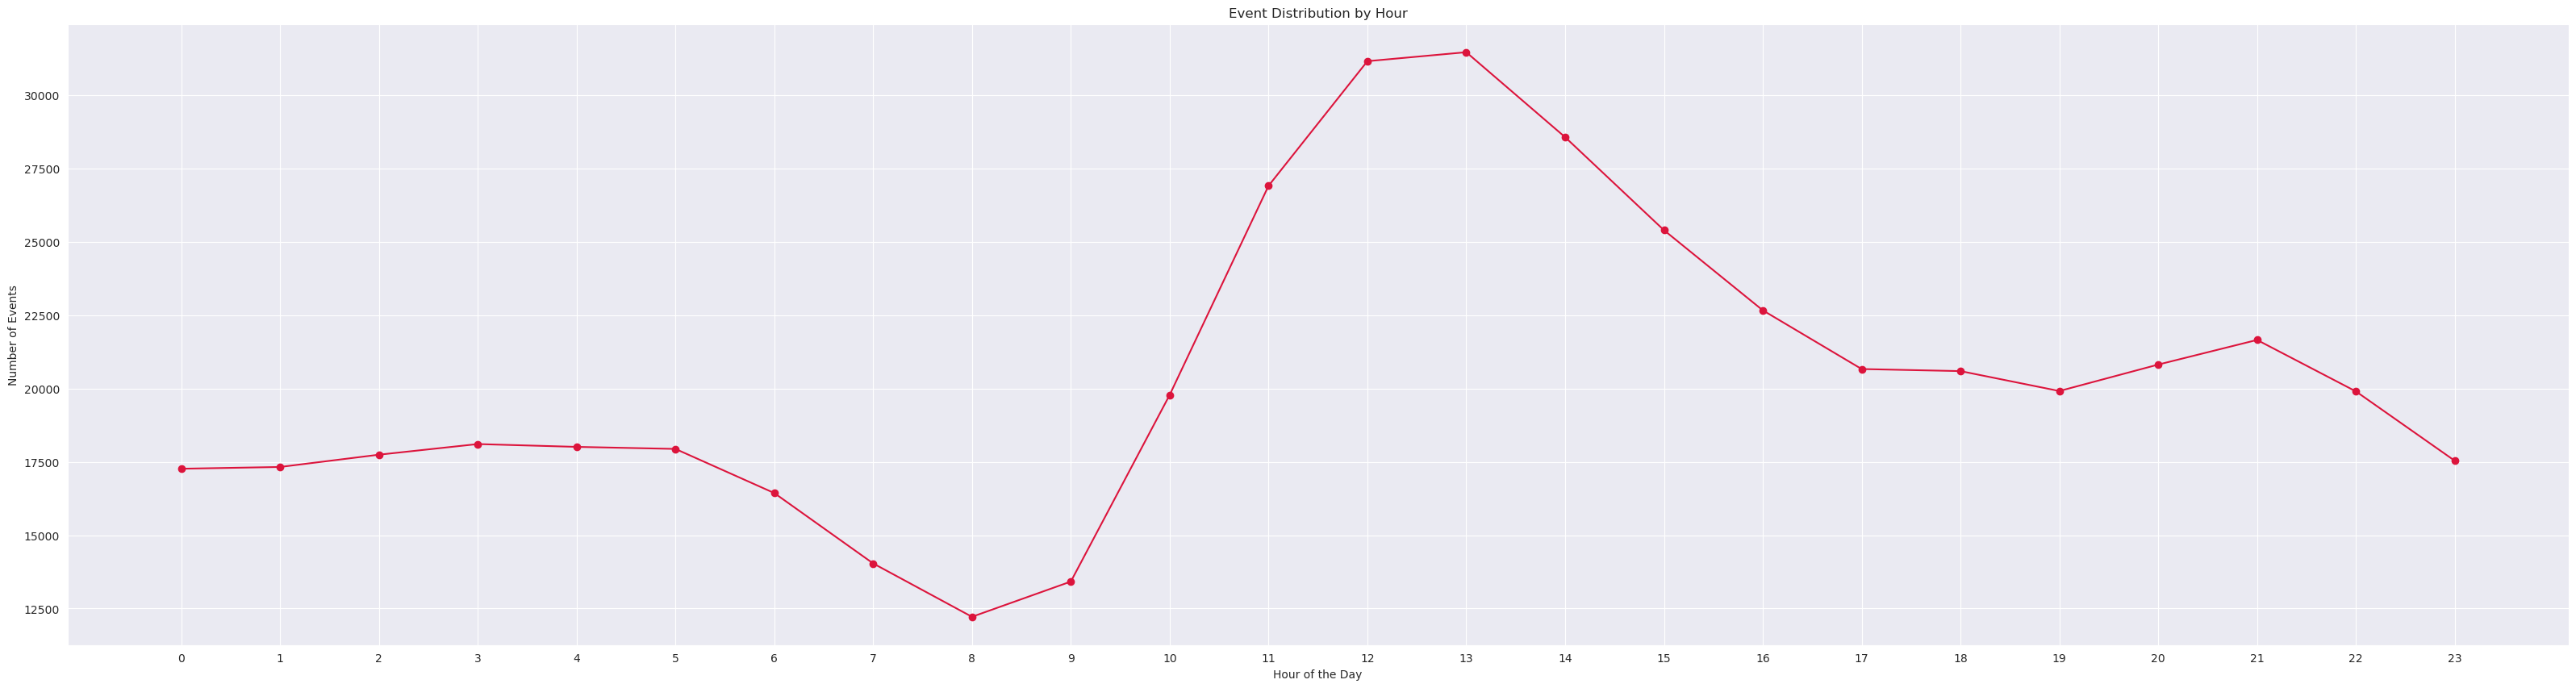

In [36]:
df["event_time"] = pd.to_datetime(df["event_time"])
event_counts_hourly = df["event_time"].dt.hour.value_counts().sort_index()

plt.figure(figsize=(40, 10))
plt.plot(event_counts_hourly.index, event_counts_hourly.values, marker="o", linestyle="-", color="crimson")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Events")
plt.title("Event Distribution by Hour")
plt.xticks(range(24))
plt.show()

In [37]:
outliers = user_daily_reads[user_daily_reads["daily_reads"] > 2]
outliers_merged = outliers.merge(
    merged_df[['user_id', 'event_time', 'event_properties_book_id', 'event_properties_format',
               'user_properties_age', 'country', 'topic']],
    on=["user_id", "event_time"],
    how="left"
)

outliers

,user_id,event_time,daily_reads,z_score,rolling_avg
66,0030EYEB,2024-05-30,3,4.790614,1.428571
70,004HJPZ9,2024-04-21,3,4.790614,1.571429
100,008U1RZF,2024-04-14,3,4.790614,1.428571
102,008U1RZF,2024-04-17,3,4.790614,1.714286
137,00COSKYE,2024-06-30,3,4.790614,1.285714
...,...,...,...,...,...
438419,ZZK7NXES,2024-05-13,3,4.790614,1.428571
438423,ZZKTTDHY,2024-06-06,3,4.790614,1.571429
438499,ZZQJXIDZ,2024-04-23,3,4.790614,1.571429
438533,ZZT7UGNB,2024-05-25,3,4.790614,1.571429


In [38]:
user_daily_reads

,user_id,event_time,daily_reads,z_score,rolling_avg
0,0001M3PA,2024-04-09,1,-0.295736,NaN
1,00036L7K,2024-06-11,1,-0.295736,NaN
2,000EASFZ,2024-04-11,1,-0.295736,NaN
3,000EASFZ,2024-04-20,1,-0.295736,NaN
4,000EASFZ,2024-05-06,1,-0.295736,NaN
...,...,...,...,...,...
438611,ZZYY8S7C,2024-04-30,1,-0.295736,1.142857
438612,ZZZ06MW2,2024-06-05,1,-0.295736,1.000000
438613,ZZZ128XJ,2024-04-25,2,2.247439,1.142857
438614,ZZZ128XJ,2024-06-05,1,-0.295736,1.142857


In [39]:
# df[df['user_id'] == '000EASFZ']
df[df['user_id'] == 'TQLQQLV6']

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
54223,54223,TQLQQLV6,2024-06-26 20:46:49,United States,summary_last_page,d9c5984592174ac3a855,audio,39.0
86983,86983,TQLQQLV6,2024-06-26 20:46:41,United States,summary_last_page,d9c5984592174ac3a855,audio,46.0
169246,169246,TQLQQLV6,2024-06-26 20:46:43,United States,summary_last_page,d9c5984592174ac3a855,audio,30.0
208086,208086,TQLQQLV6,2024-06-26 20:46:45,United States,summary_last_page,d9c5984592174ac3a855,audio,49.0
267173,267173,TQLQQLV6,2024-06-26 20:48:00,United States,summary_start,7jlIJDFk4DmgTfJuyFLc,audio,63.0
390662,390662,TQLQQLV6,2024-06-26 20:46:48,United States,summary_last_page,d9c5984592174ac3a855,audio,37.0
442619,442619,TQLQQLV6,2024-06-26 20:46:46,United States,summary_last_page,d9c5984592174ac3a855,audio,20.0
470108,470108,TQLQQLV6,2024-06-26 20:46:50,United States,summary_last_page,d9c5984592174ac3a855,audio,49.0
519802,519802,TQLQQLV6,2024-06-26 20:46:42,United States,summary_last_page,d9c5984592174ac3a855,audio,22.0


In [40]:
users_without_age_changes = df_copy[~df_copy["user_id"].isin(users_with_changes_ids)]
users_without_age_changes[users_without_age_changes['user_id'] == 'O19DCQ97']


,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic,prev_event_time,time_diff,hour
314180,335799,O19DCQ97,2024-06-14 10:15:36,Dominican Republic,summary_last_page,8d9512d39b14461a9d47,text,46.0,Unknown,NaT,NaN,10
431406,461009,O19DCQ97,2024-06-18 15:26:24,Dominican Republic,summary_start,9114326ab1e54a3fabfe,audio,46.0,Negotiation Skills,2024-06-14 10:15:36,101.18,15


In [41]:
# age_distribution(users_without_age_changes)
# age_distribution(users_without_age_changes, unique=True)
users_without_age_changes.user_id.value_counts()

user_id
KRTTZYAZ    3
XOLTP31D    3
V1WA8HBI    3
VKDDGTUT    3
TCSW3NGX    3
           ..
C2TQDPOP    1
C2SZ1PU5    1
C2SFEKQE    1
C2RG1IVG    1
C2YJY4QB    1
Name: count, Length: 128071, dtype: int64

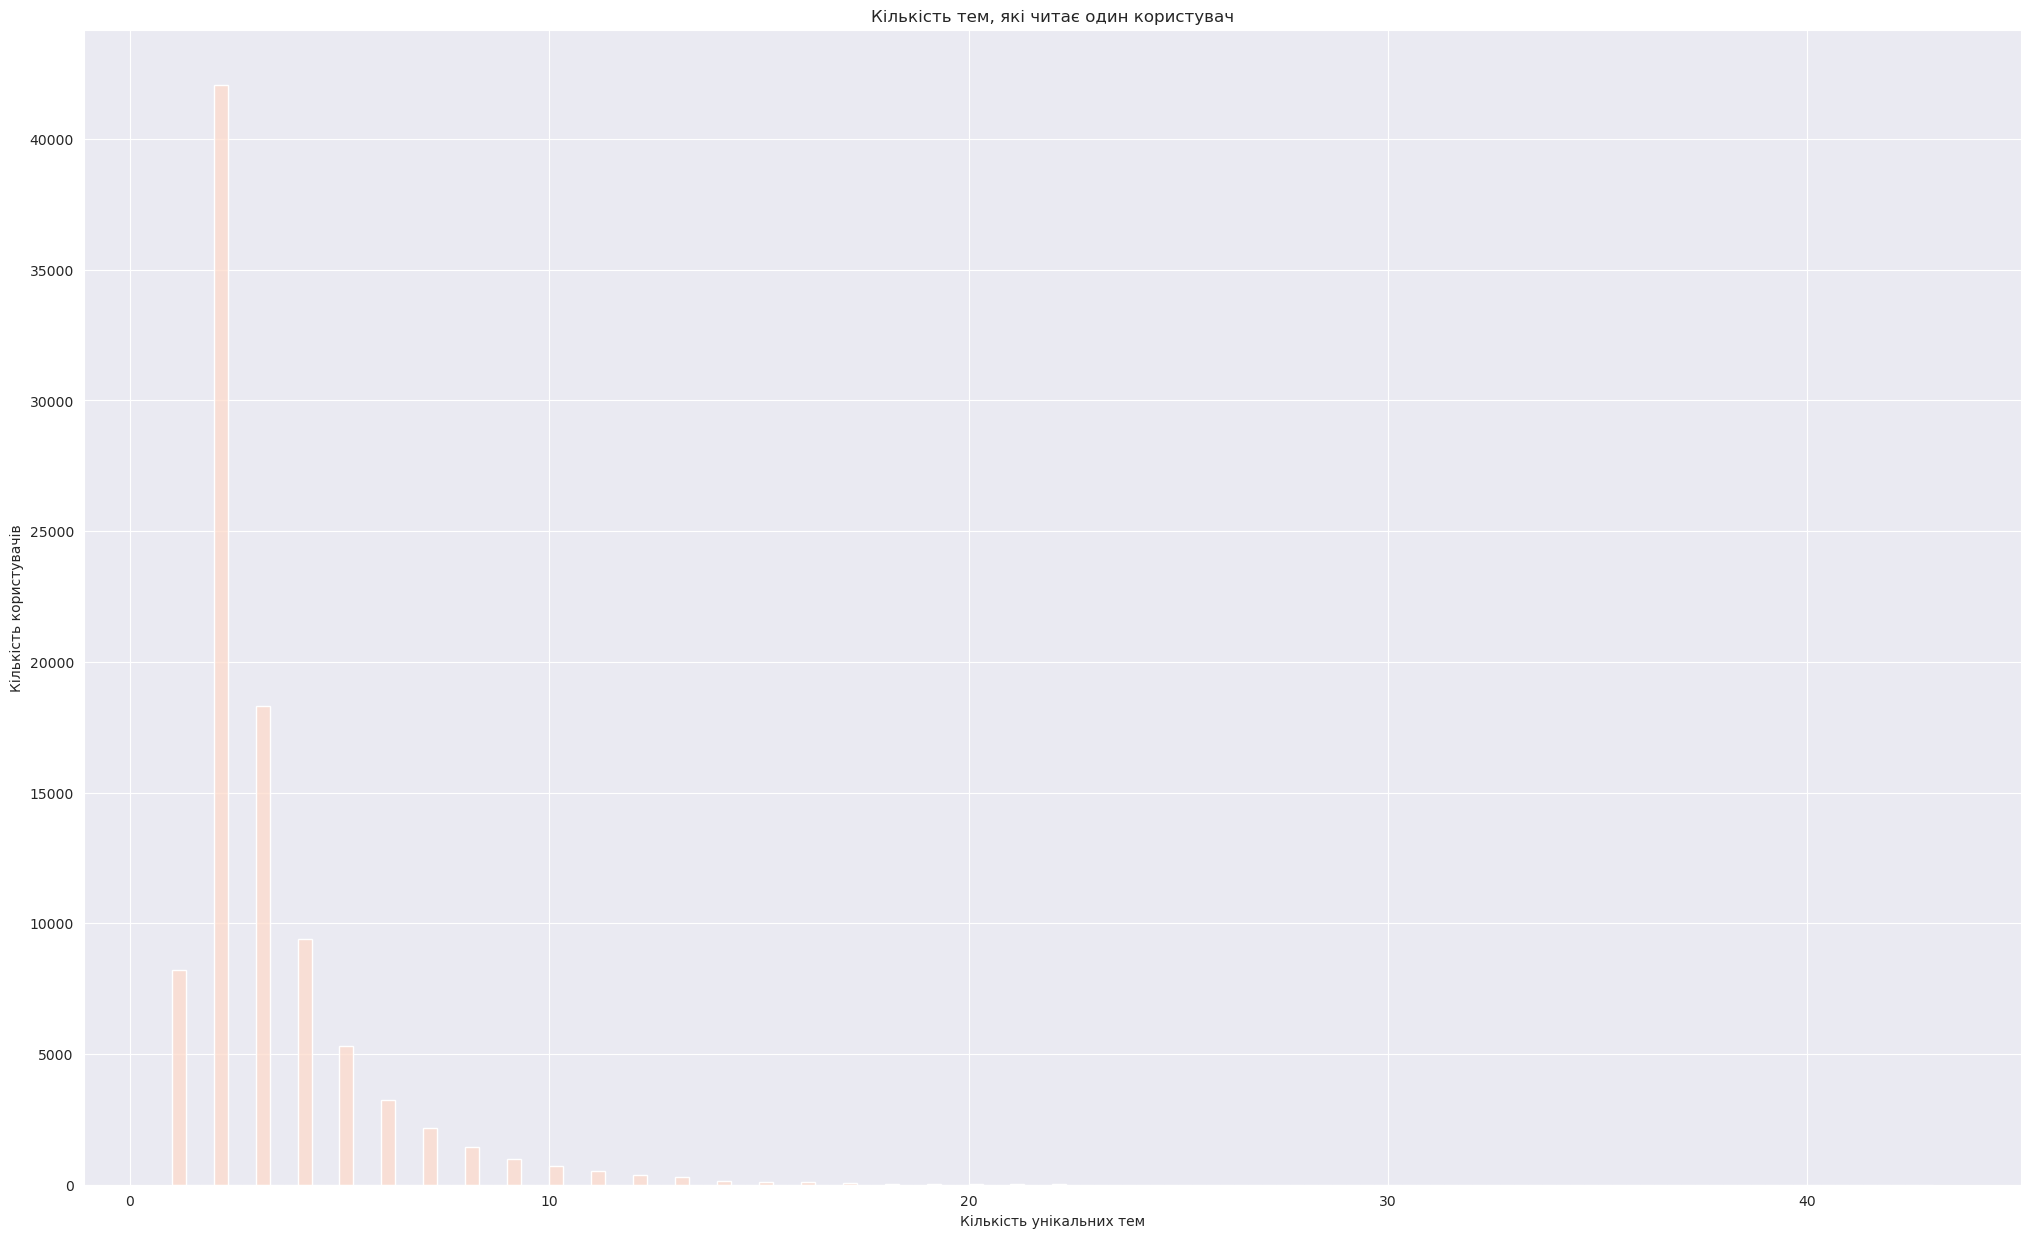

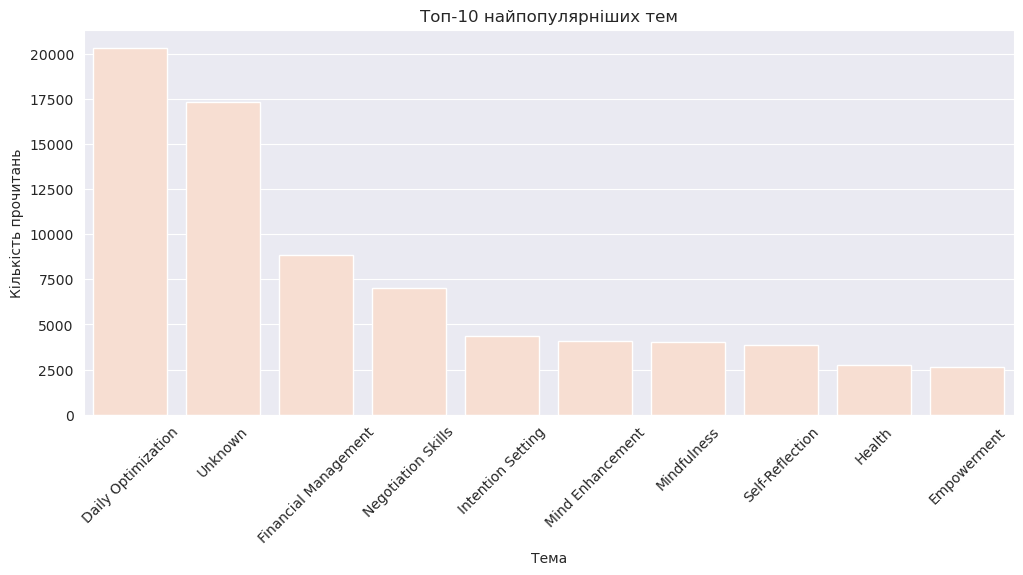

In [42]:
# Кількість унікальних тем, які прочитав кожен користувач
user_topic_counts = users_with_age_changes.groupby("user_id")["topic"].nunique()

plt.figure(figsize=(25, 15))
sns.histplot(user_topic_counts, bins=126)
plt.title("Кількість тем, які читає один користувач")
plt.xlabel("Кількість унікальних тем")
plt.ylabel("Кількість користувачів")
plt.show()

# Популярність тем
topic_counts = users_without_age_changes["topic"].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=topic_counts.index[:10], y=topic_counts.values[:10])
plt.xticks(rotation=45)
plt.title("Топ-10 найпопулярніших тем")
plt.xlabel("Тема")
plt.ylabel("Кількість прочитань")
plt.show()


In [43]:
df_copy[df_copy["user_id"].isin(users_with_changes_ids)][["user_id", "event_time", "user_properties_age"]].sort_values(by=["user_id", "event_time"])


,user_id,event_time,user_properties_age
104508,000EASFZ,2024-04-11 23:08:29,28.0
268767,000EASFZ,2024-04-20 19:27:49,54.0
38908,000EASFZ,2024-05-06 04:21:53,25.0
2411,000EASFZ,2024-05-15 10:35:30,31.0
318910,000EASFZ,2024-05-20 08:51:16,58.0
...,...,...,...
311307,ZZYEFUOG,2024-06-25 00:50:34,53.0
195873,ZZZ128XJ,2024-04-25 14:36:55,34.0
380091,ZZZ128XJ,2024-04-25 18:04:34,36.0
153980,ZZZ128XJ,2024-06-05 17:53:43,54.0


In [44]:
df_copy[df_copy["user_id"].isin(users_with_changes_ids)]["user_id"].value_counts().head(20)



user_id
O608SMH5    107
PHS975R4     93
Y58F6GCD     92
OU037AKN     88
KTREUFV8     85
J6RP4VVQ     66
EQOIXN56     65
7QO0FY2O     64
VTWLUKUX     61
NV1AU710     61
EAFUKS75     59
J0UZ4O9S     58
XCPZYGHQ     57
UPVCJEB2     56
W13YMNM2     52
Y3DXD58I     52
BZI1GGFI     51
BYEWHT3I     51
BQ8W43BE     51
RPDJEVPP     50
Name: count, dtype: int64

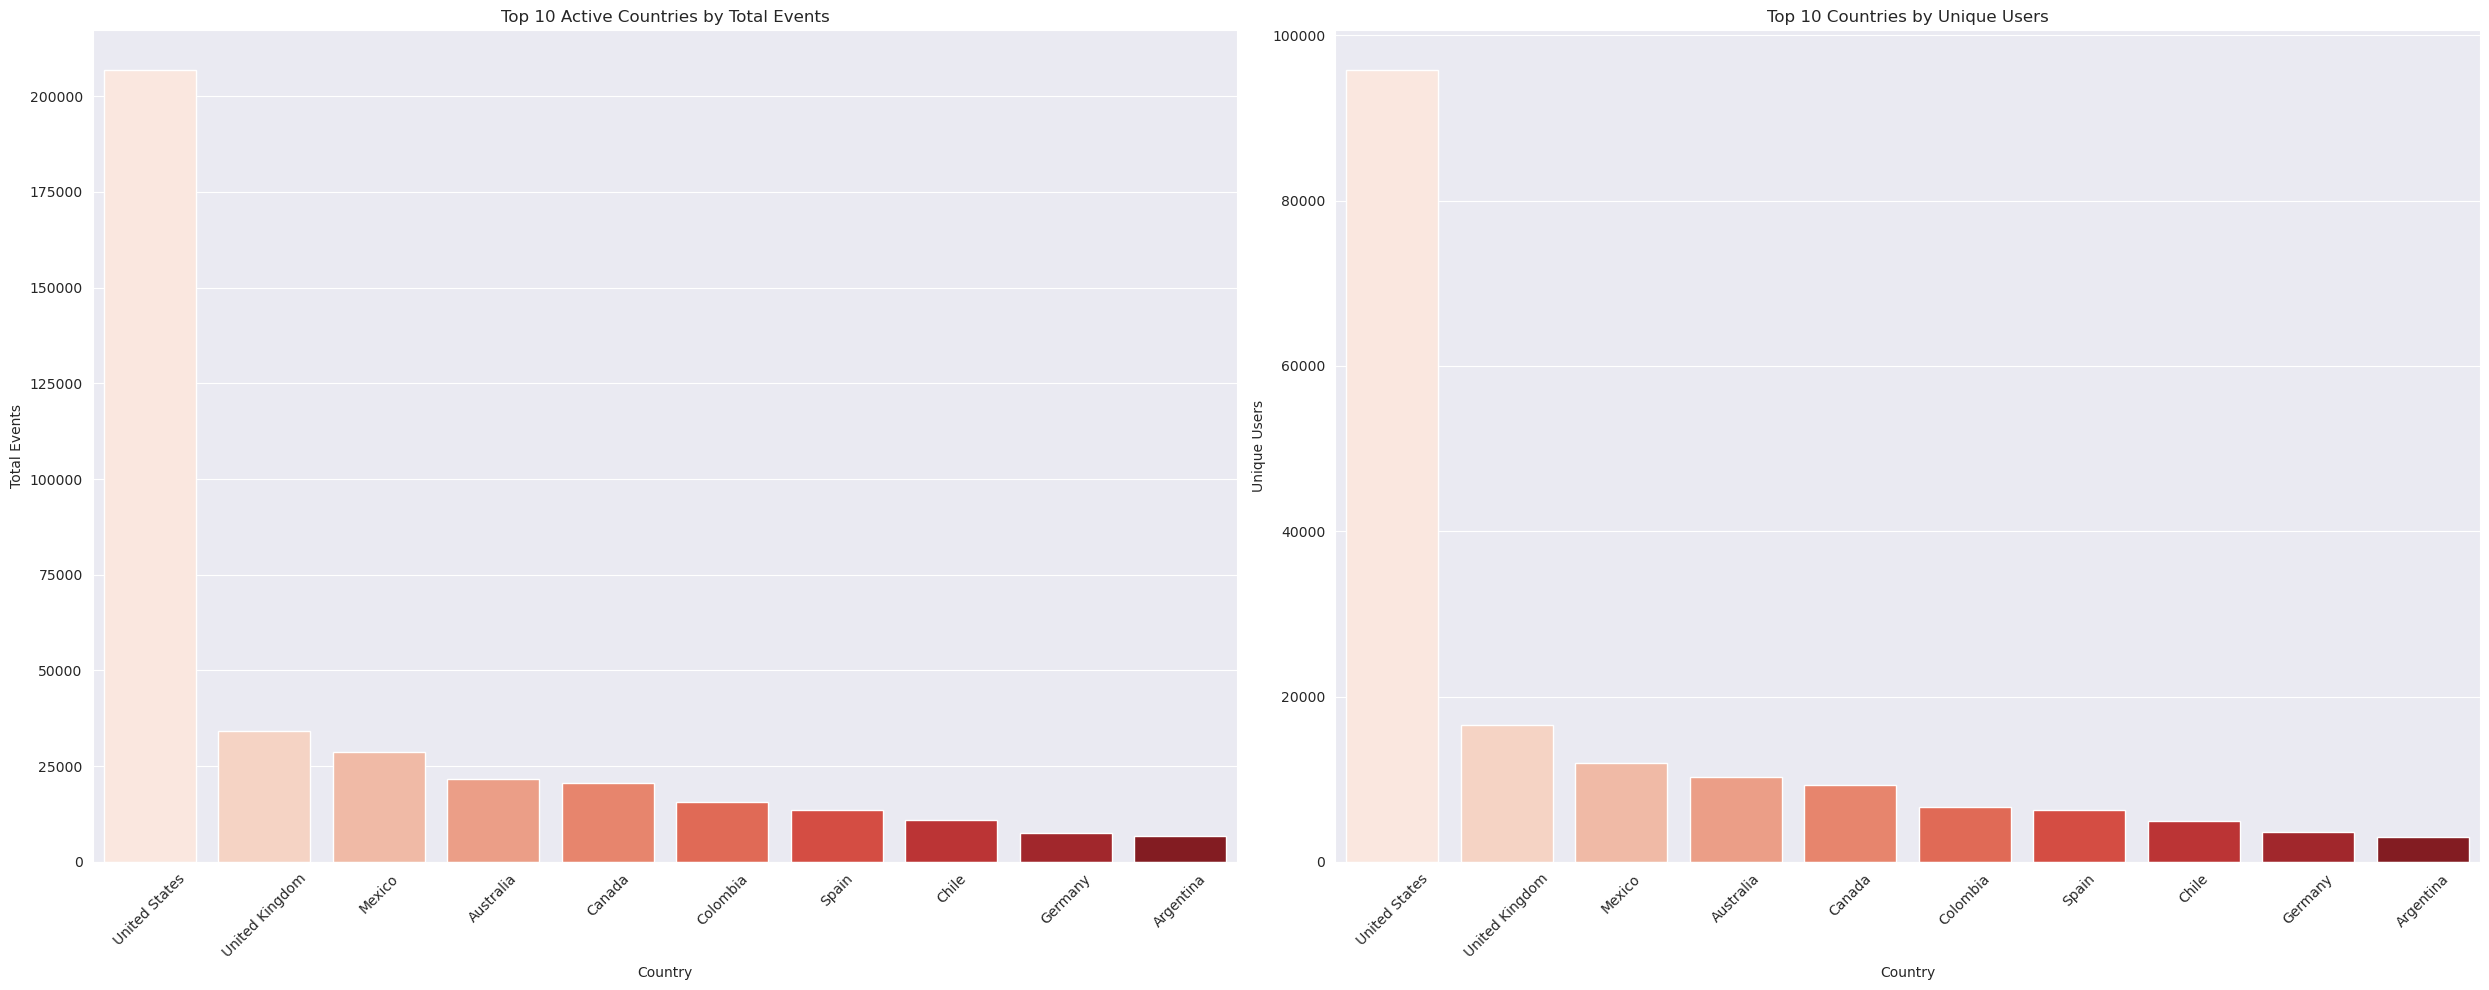

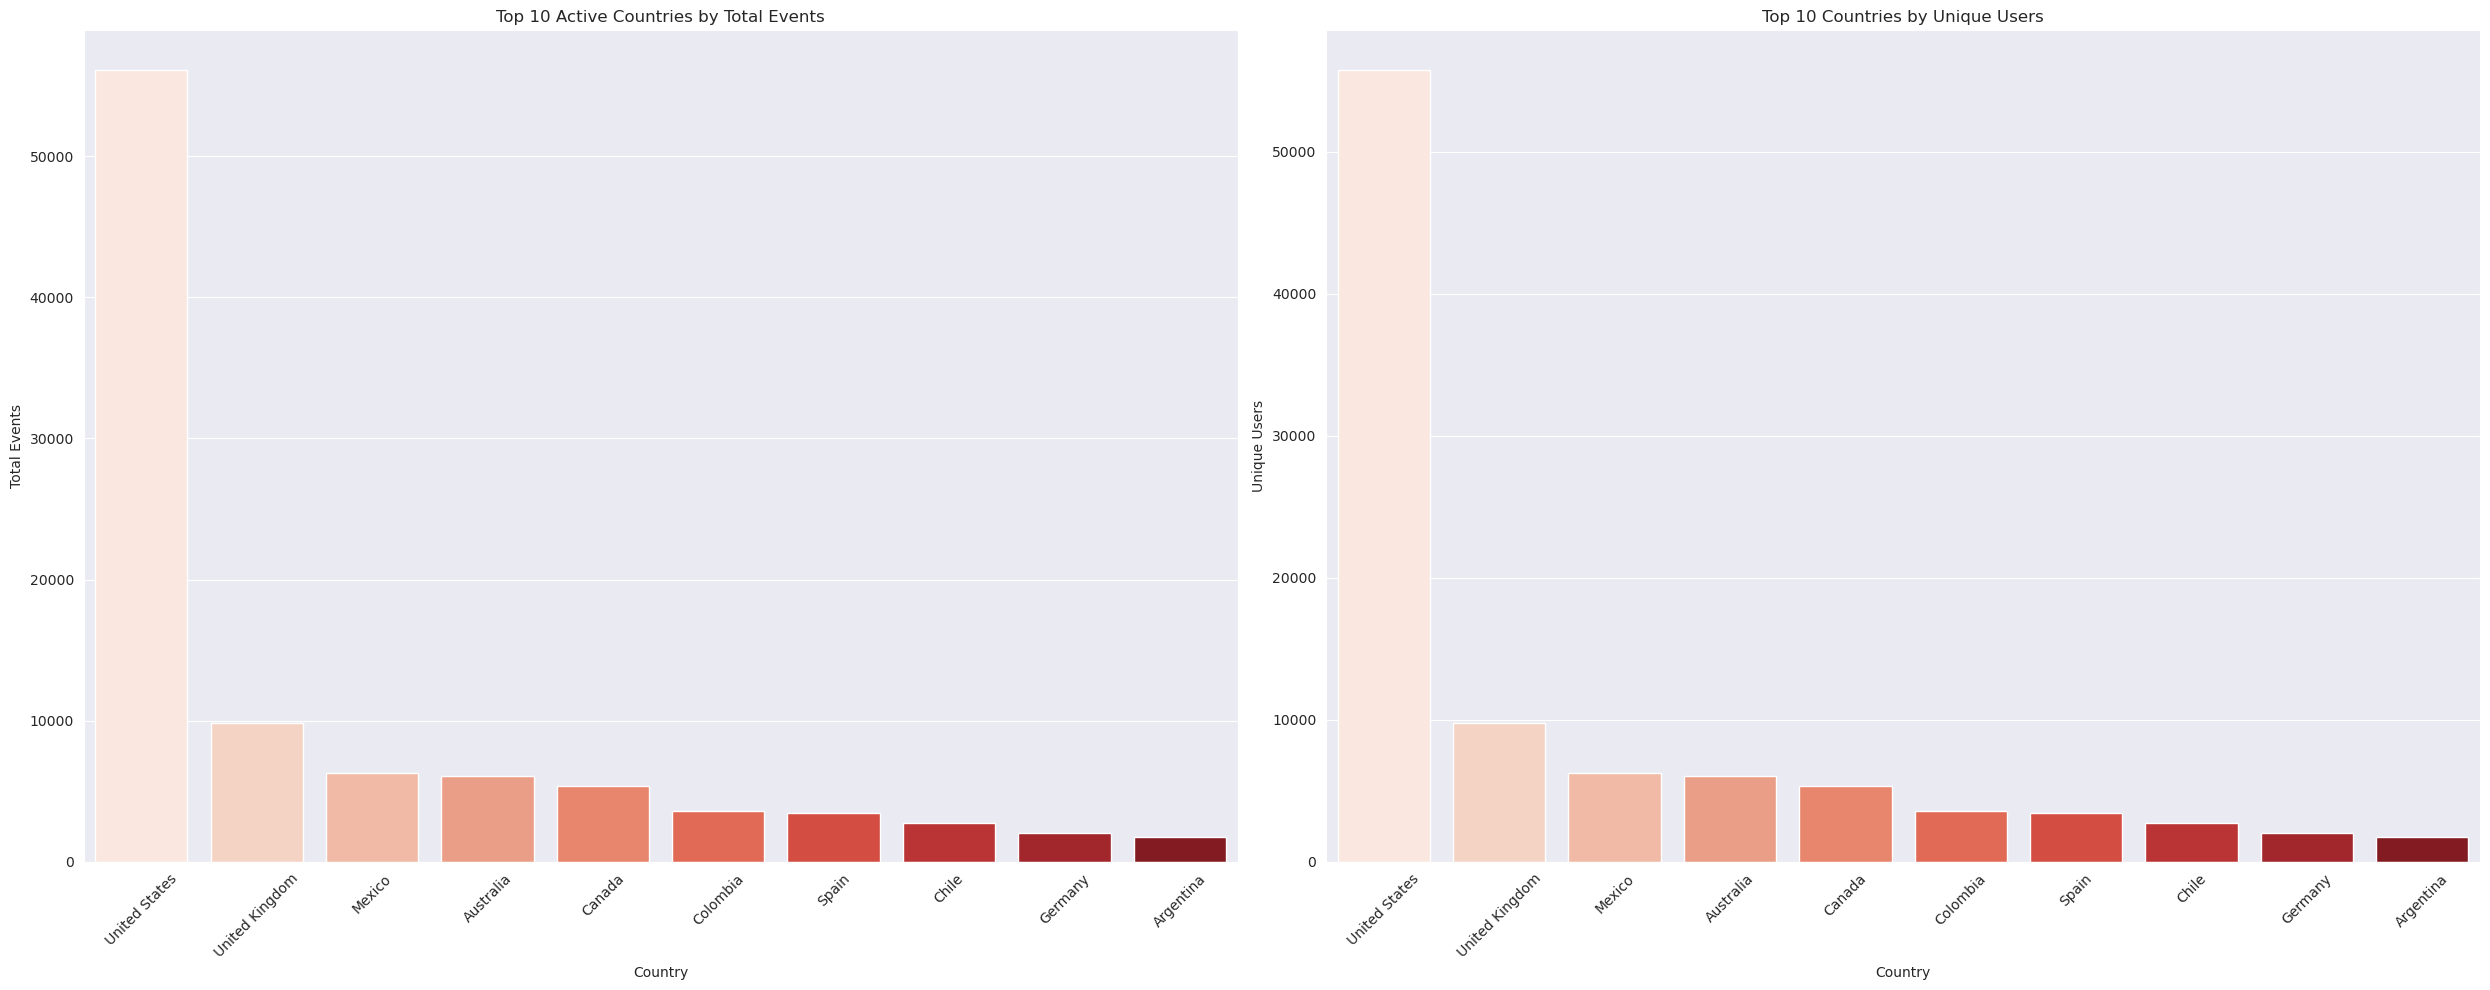

In [45]:
plot_country_activity(df_cleaned)
plot_country_activity(users_without_age_changes)

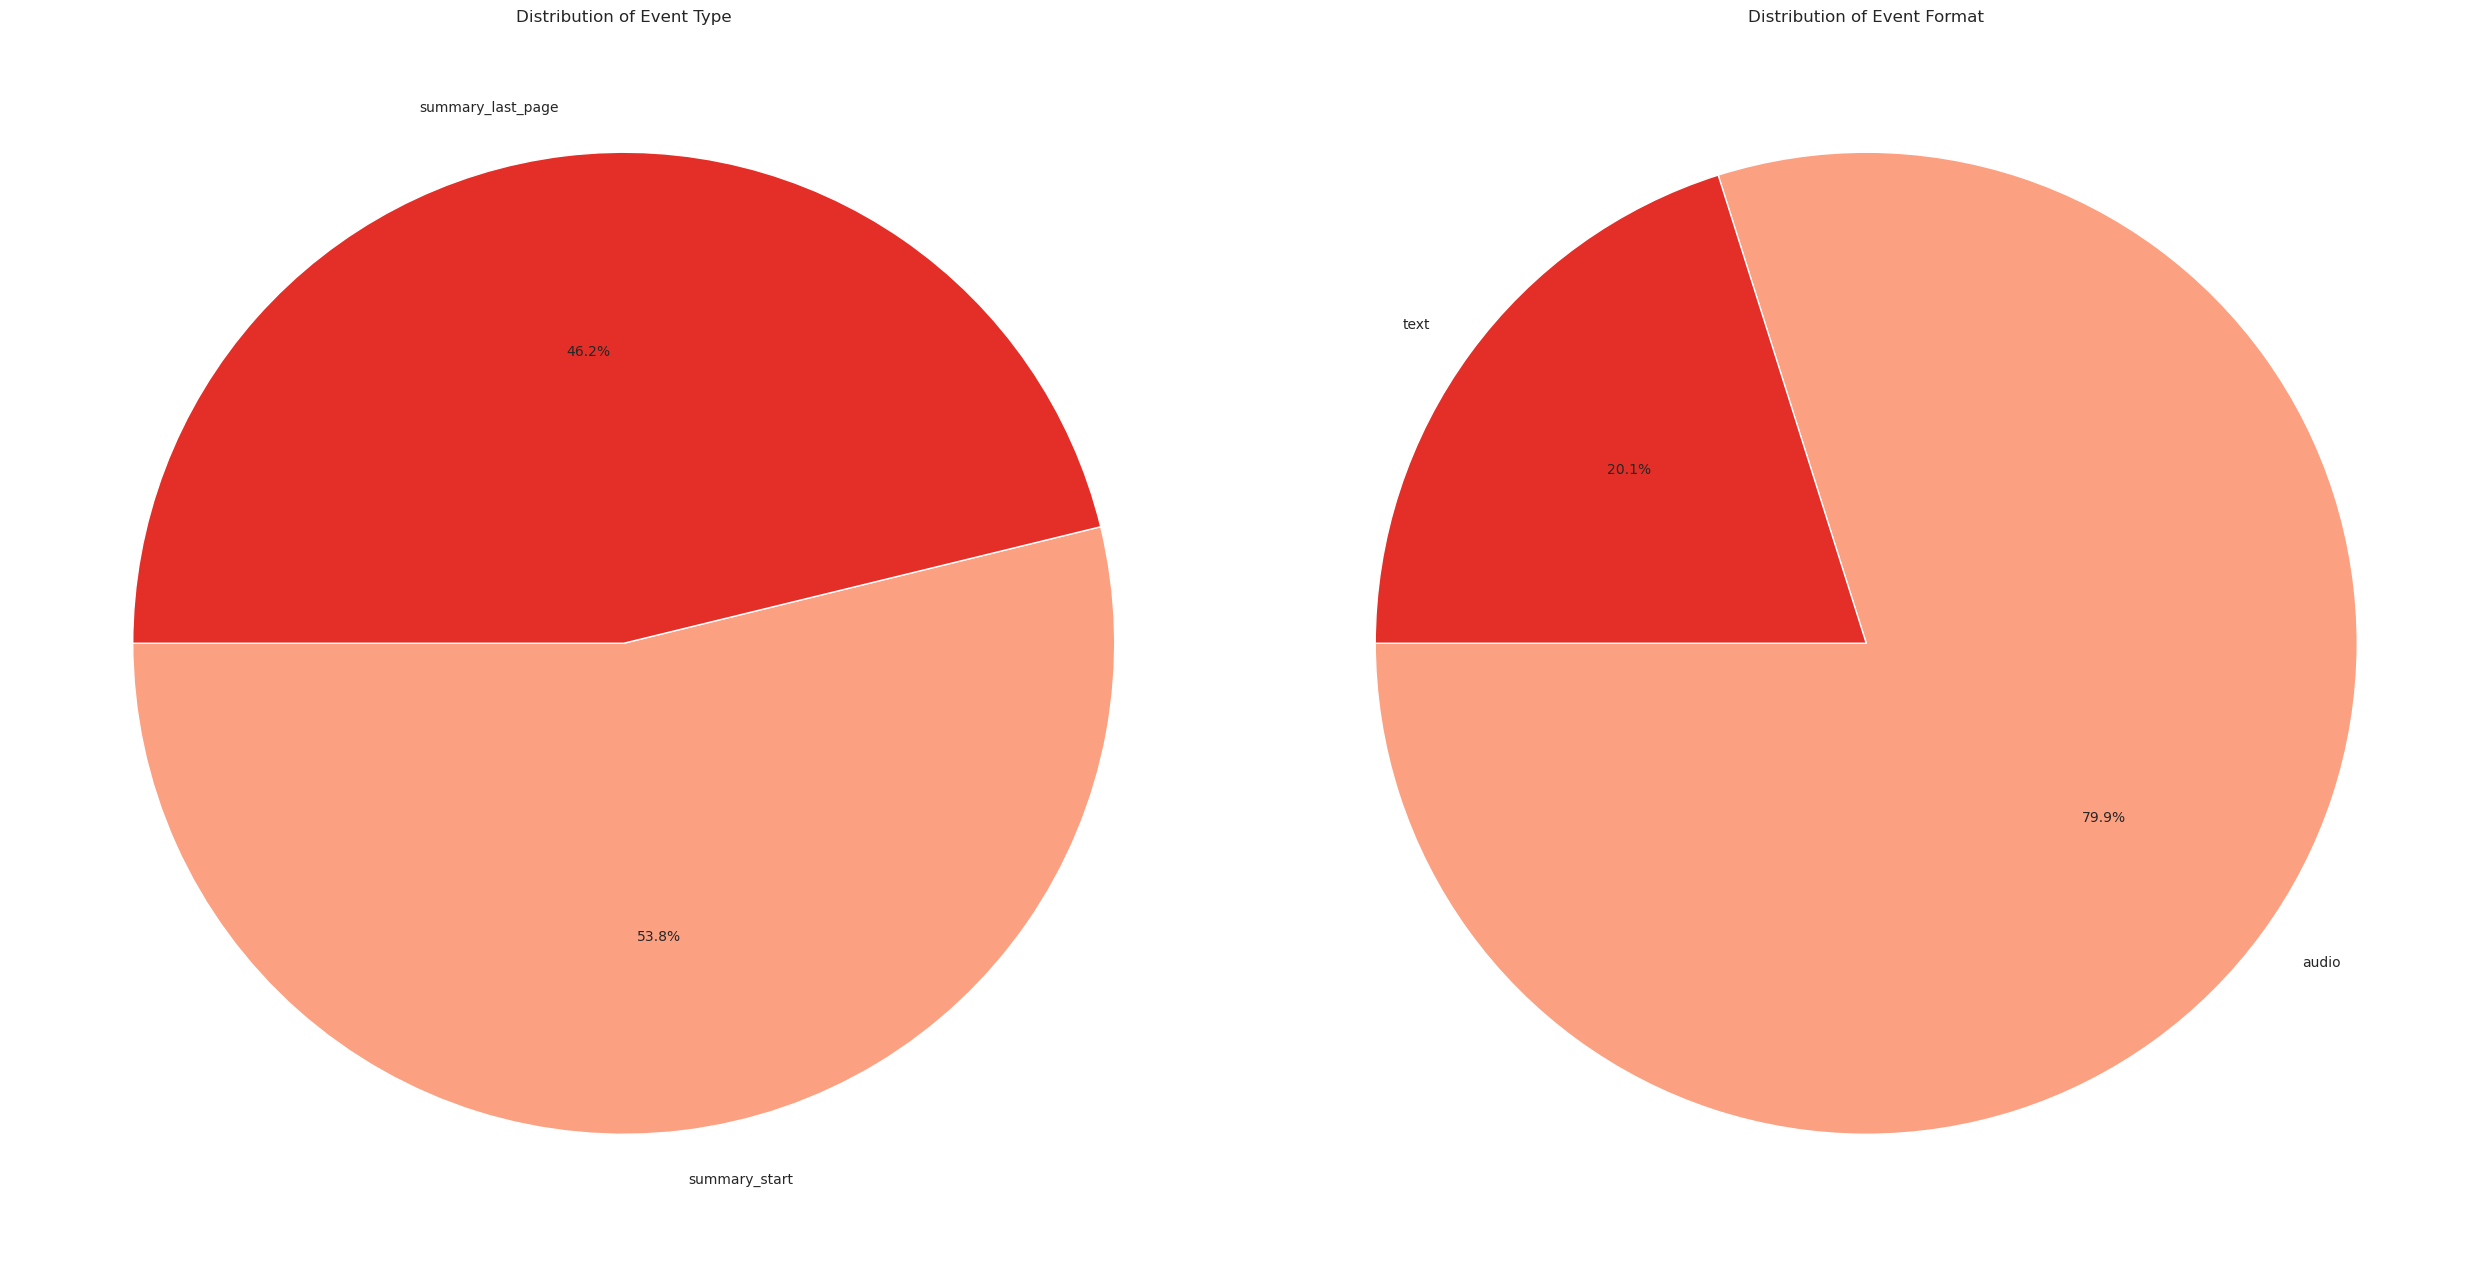

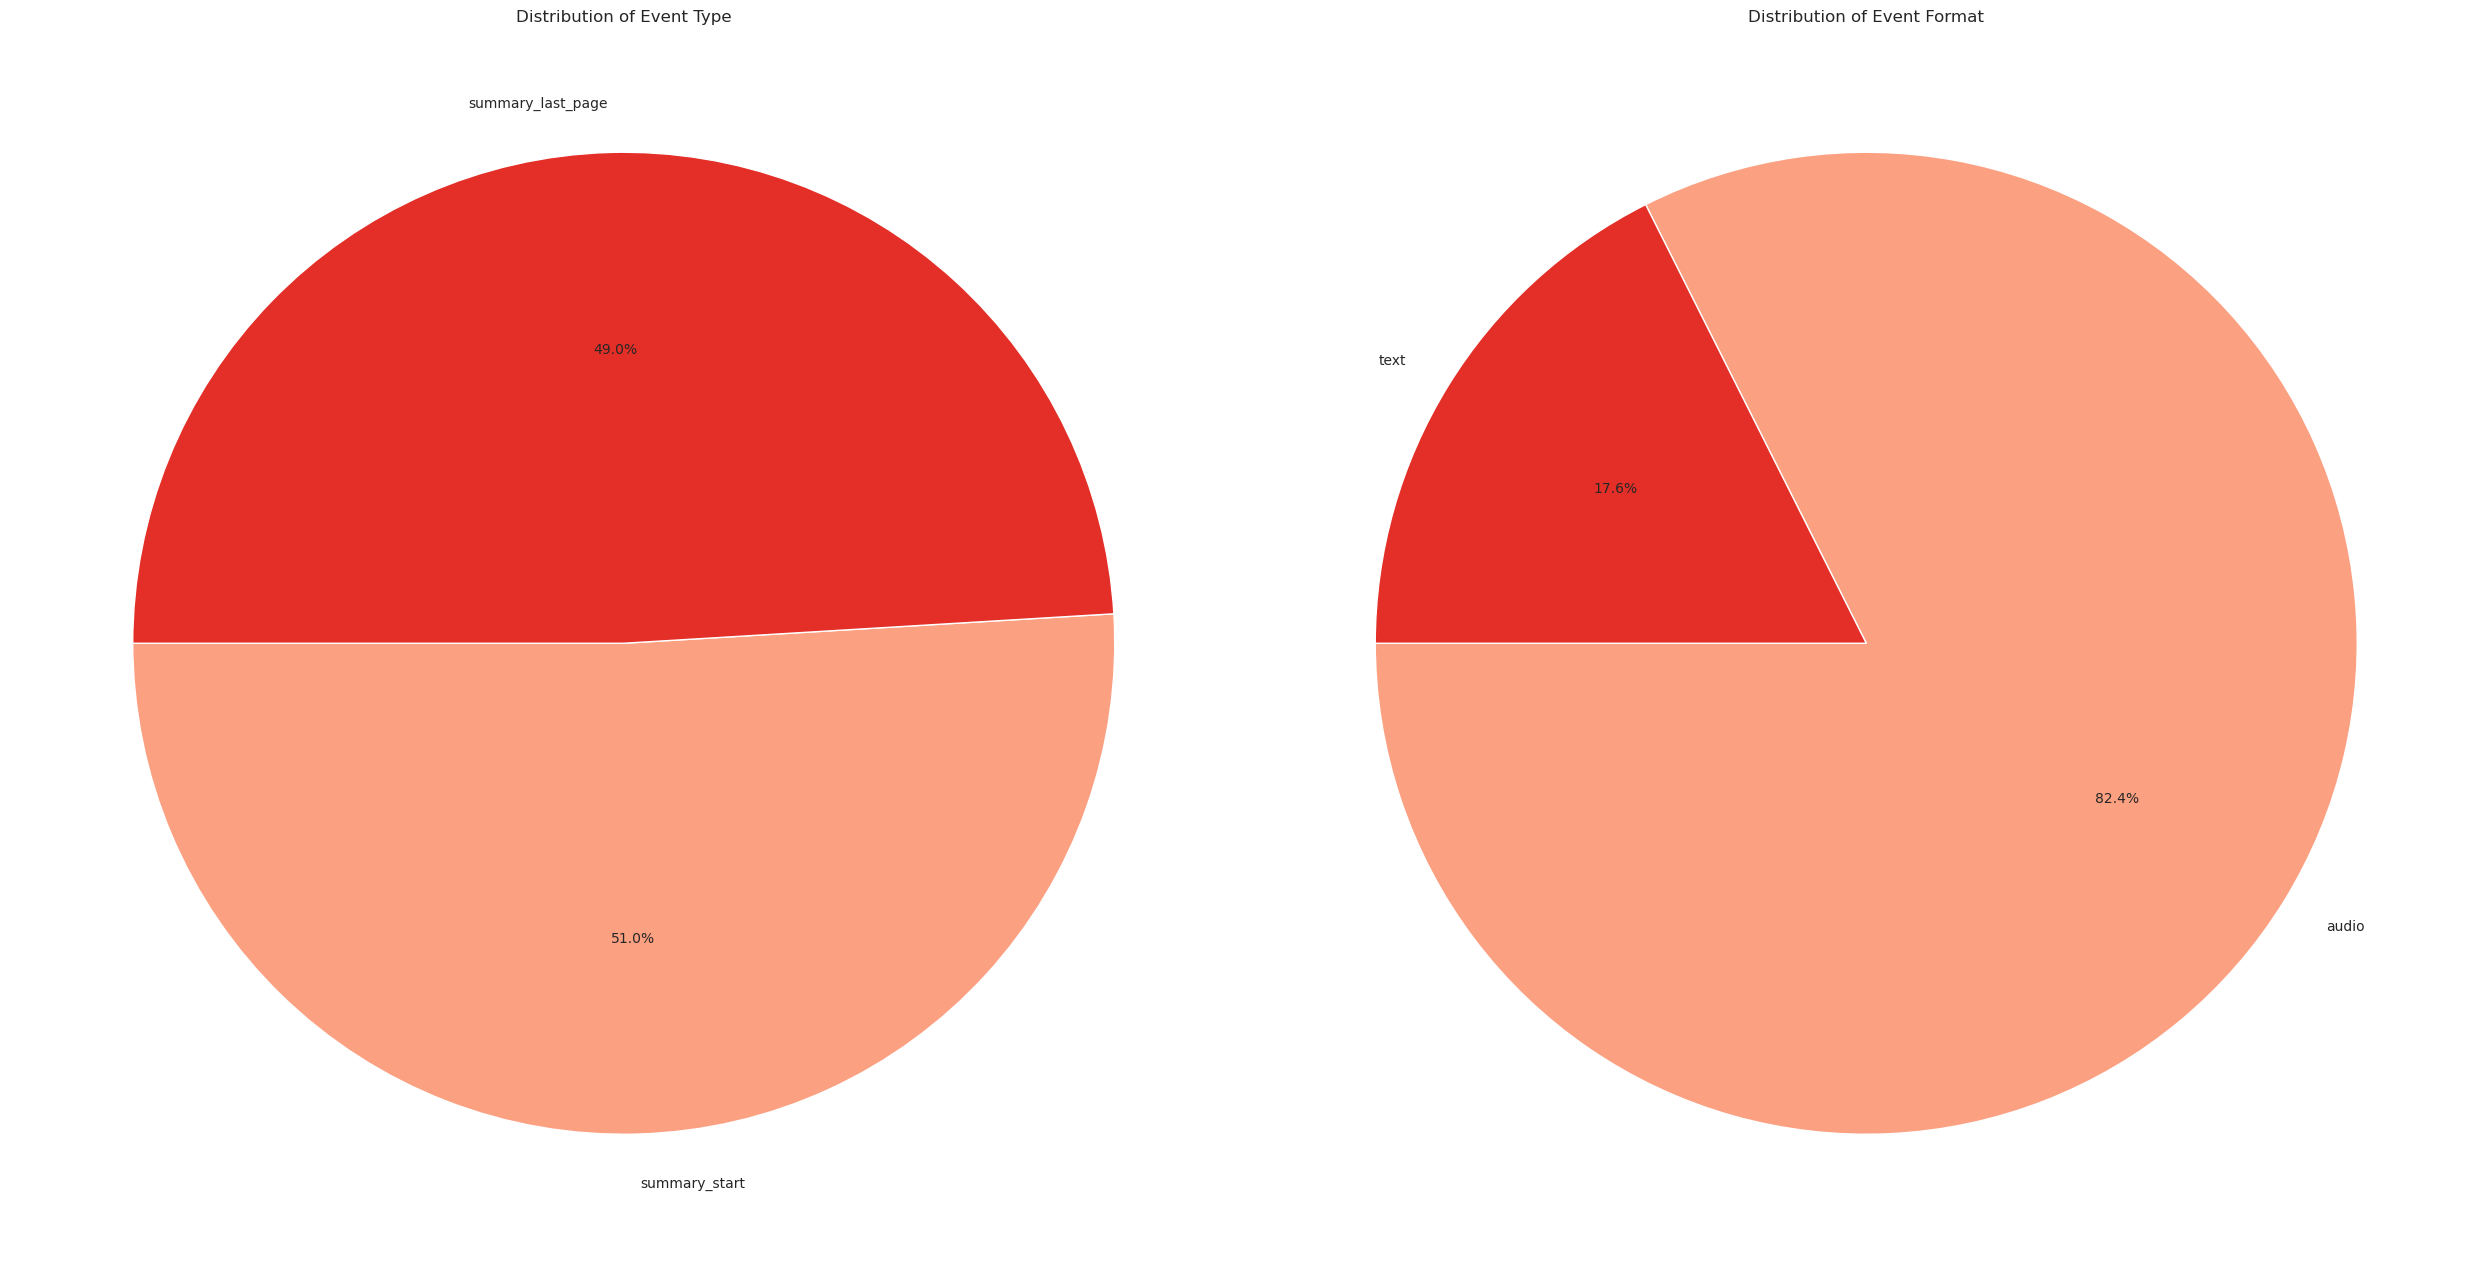

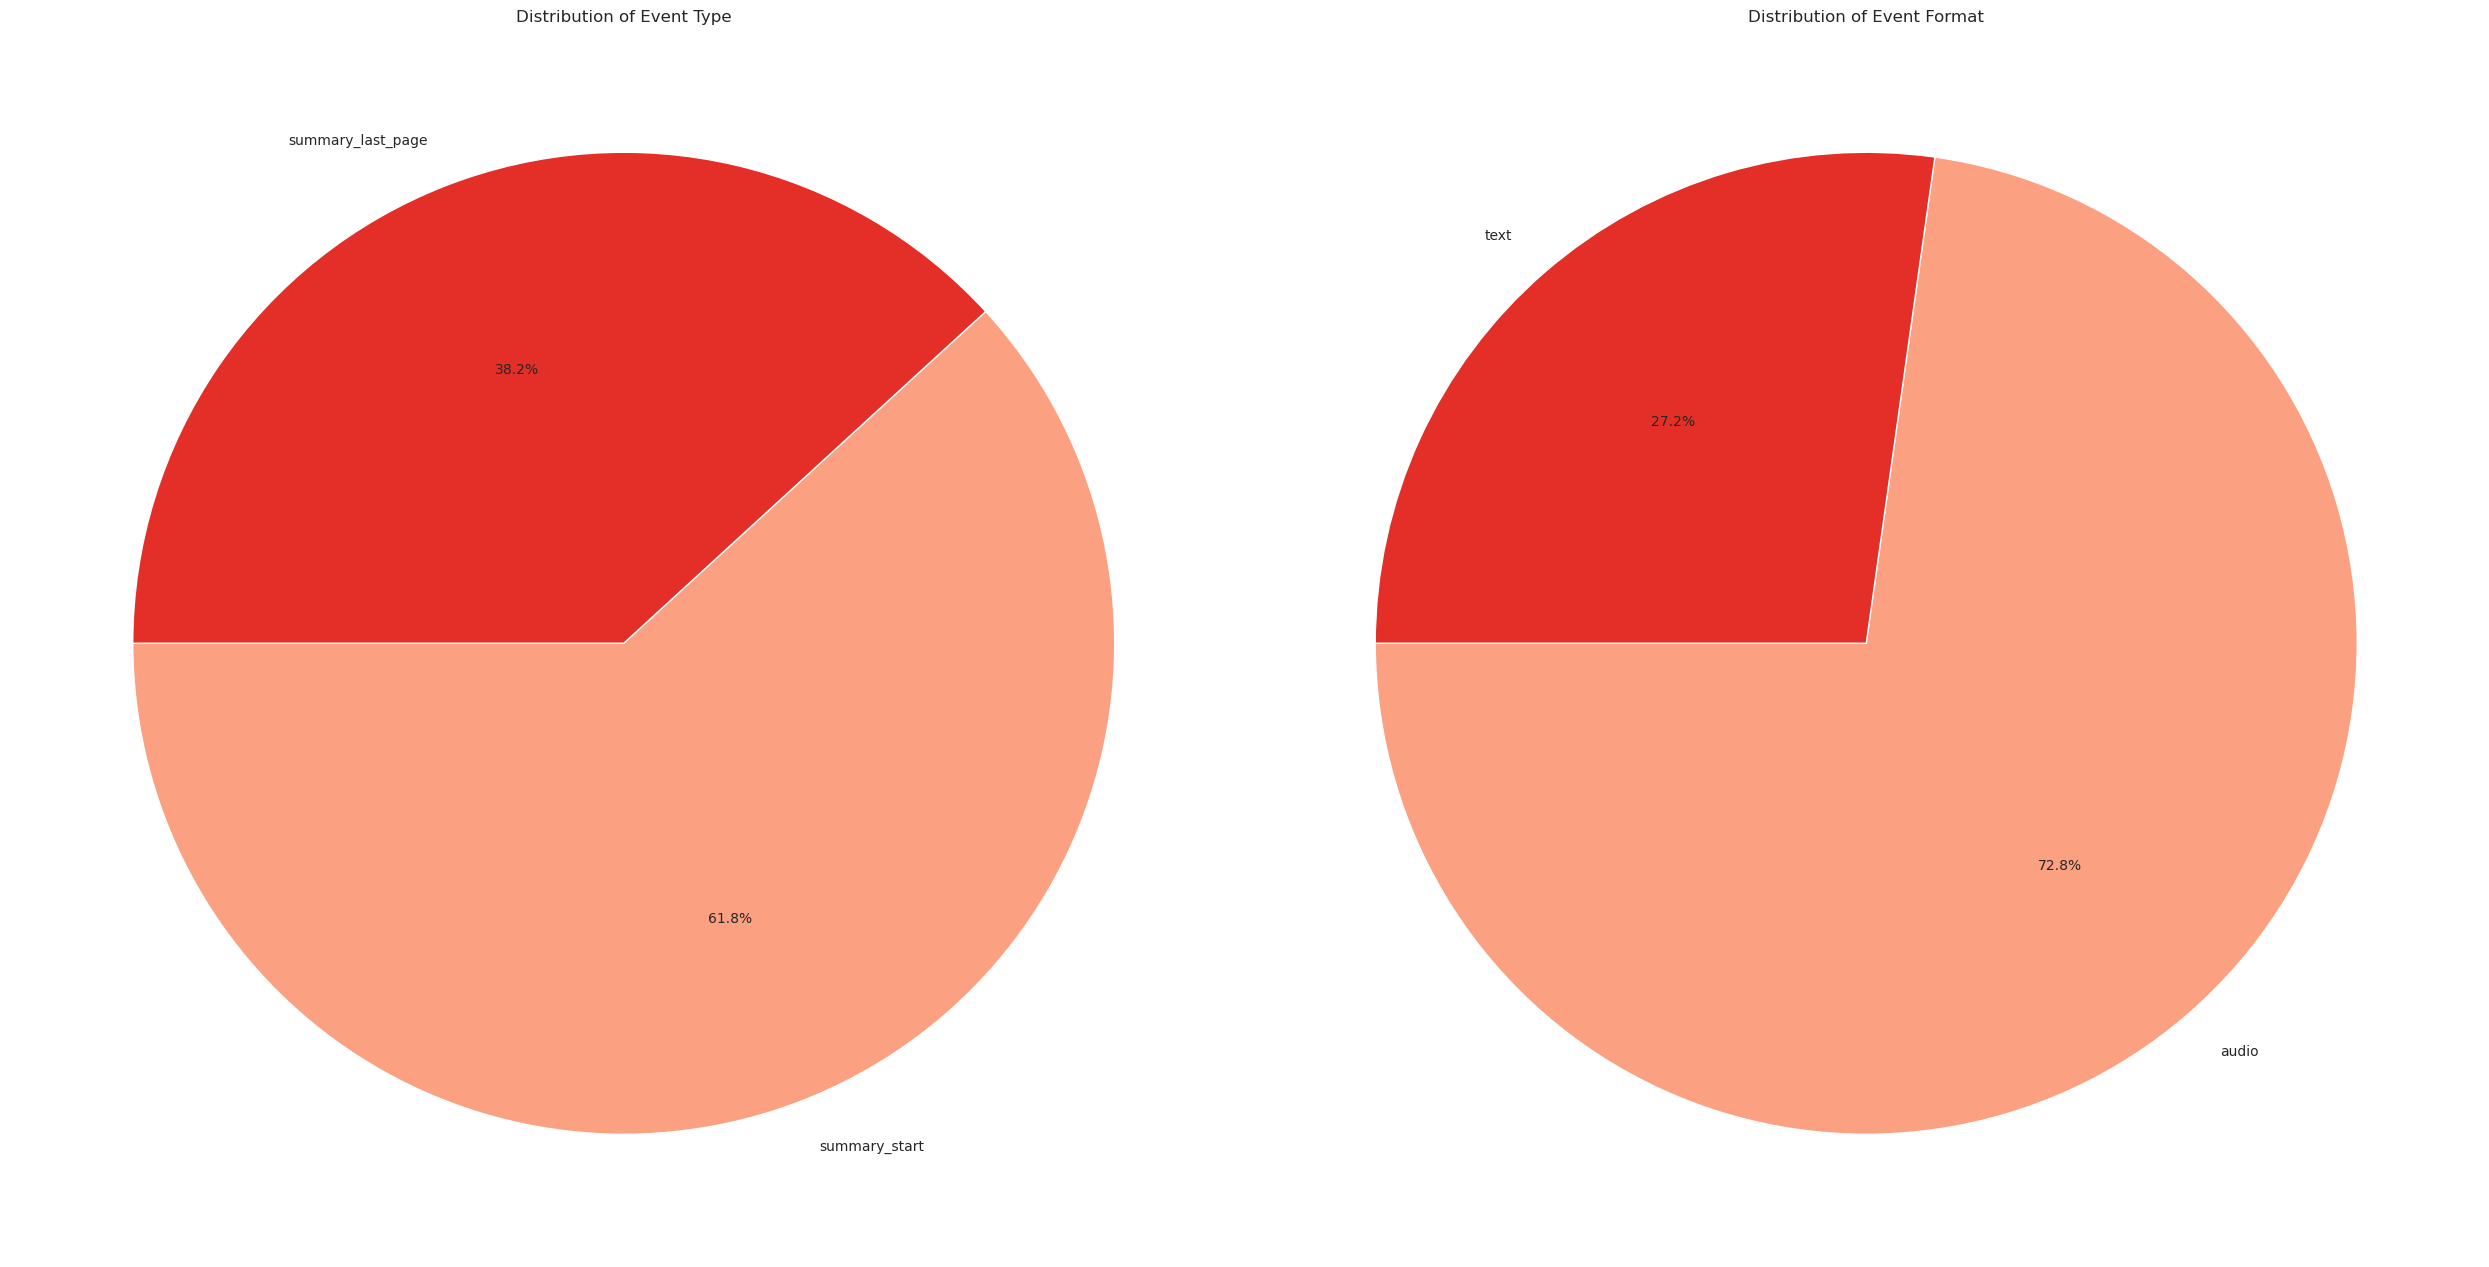

In [46]:
plot_event_distributions(df_cleaned)
plot_event_distributions(users_with_age_changes)
plot_event_distributions(users_without_age_changes)


In [47]:
print(f"Загальна кількість користувачів: {df_copy['user_id'].nunique()}")
print(f"Кількість користувачів, які змінювали вік: {len(users_with_changes_ids)}")
print(f"Кількість користувачів, які НЕ змінювали вік: {df_copy[~df_copy['user_id'].isin(users_with_changes_ids)]['user_id'].nunique()}")


Загальна кількість користувачів: 221650
Кількість користувачів, які змінювали вік: 93579
Кількість користувачів, які НЕ змінювали вік: 128071


In [48]:
df_check = df_copy[df_copy["user_id"].isin(users_with_changes_ids)]
print(df_check.groupby("user_id")["user_properties_age"].nunique().value_counts())


user_properties_age
2     43304
3     19673
4     10386
5      6285
6      3929
7      2649
8      1839
9      1394
10      997
11      782
12      601
13      416
14      314
15      241
16      163
17      126
18      112
19       85
21       58
20       56
22       33
23       25
24       22
26       20
25       17
31        8
30        7
27        7
28        6
29        5
33        5
38        3
35        3
32        2
43        2
44        2
42        1
34        1
Name: count, dtype: int64


In [49]:
df_check = df_copy[df_copy["user_id"].isin(users_with_changes_ids)]
df_check = df_check.sort_values(["user_id", "event_time"])
df_check[["user_id", "event_time", "user_properties_age"]]


,user_id,event_time,user_properties_age
104508,000EASFZ,2024-04-11 23:08:29,28.0
268767,000EASFZ,2024-04-20 19:27:49,54.0
38908,000EASFZ,2024-05-06 04:21:53,25.0
2411,000EASFZ,2024-05-15 10:35:30,31.0
318910,000EASFZ,2024-05-20 08:51:16,58.0
...,...,...,...
311307,ZZYEFUOG,2024-06-25 00:50:34,53.0
195873,ZZZ128XJ,2024-04-25 14:36:55,34.0
380091,ZZZ128XJ,2024-04-25 18:04:34,36.0
153980,ZZZ128XJ,2024-06-05 17:53:43,54.0


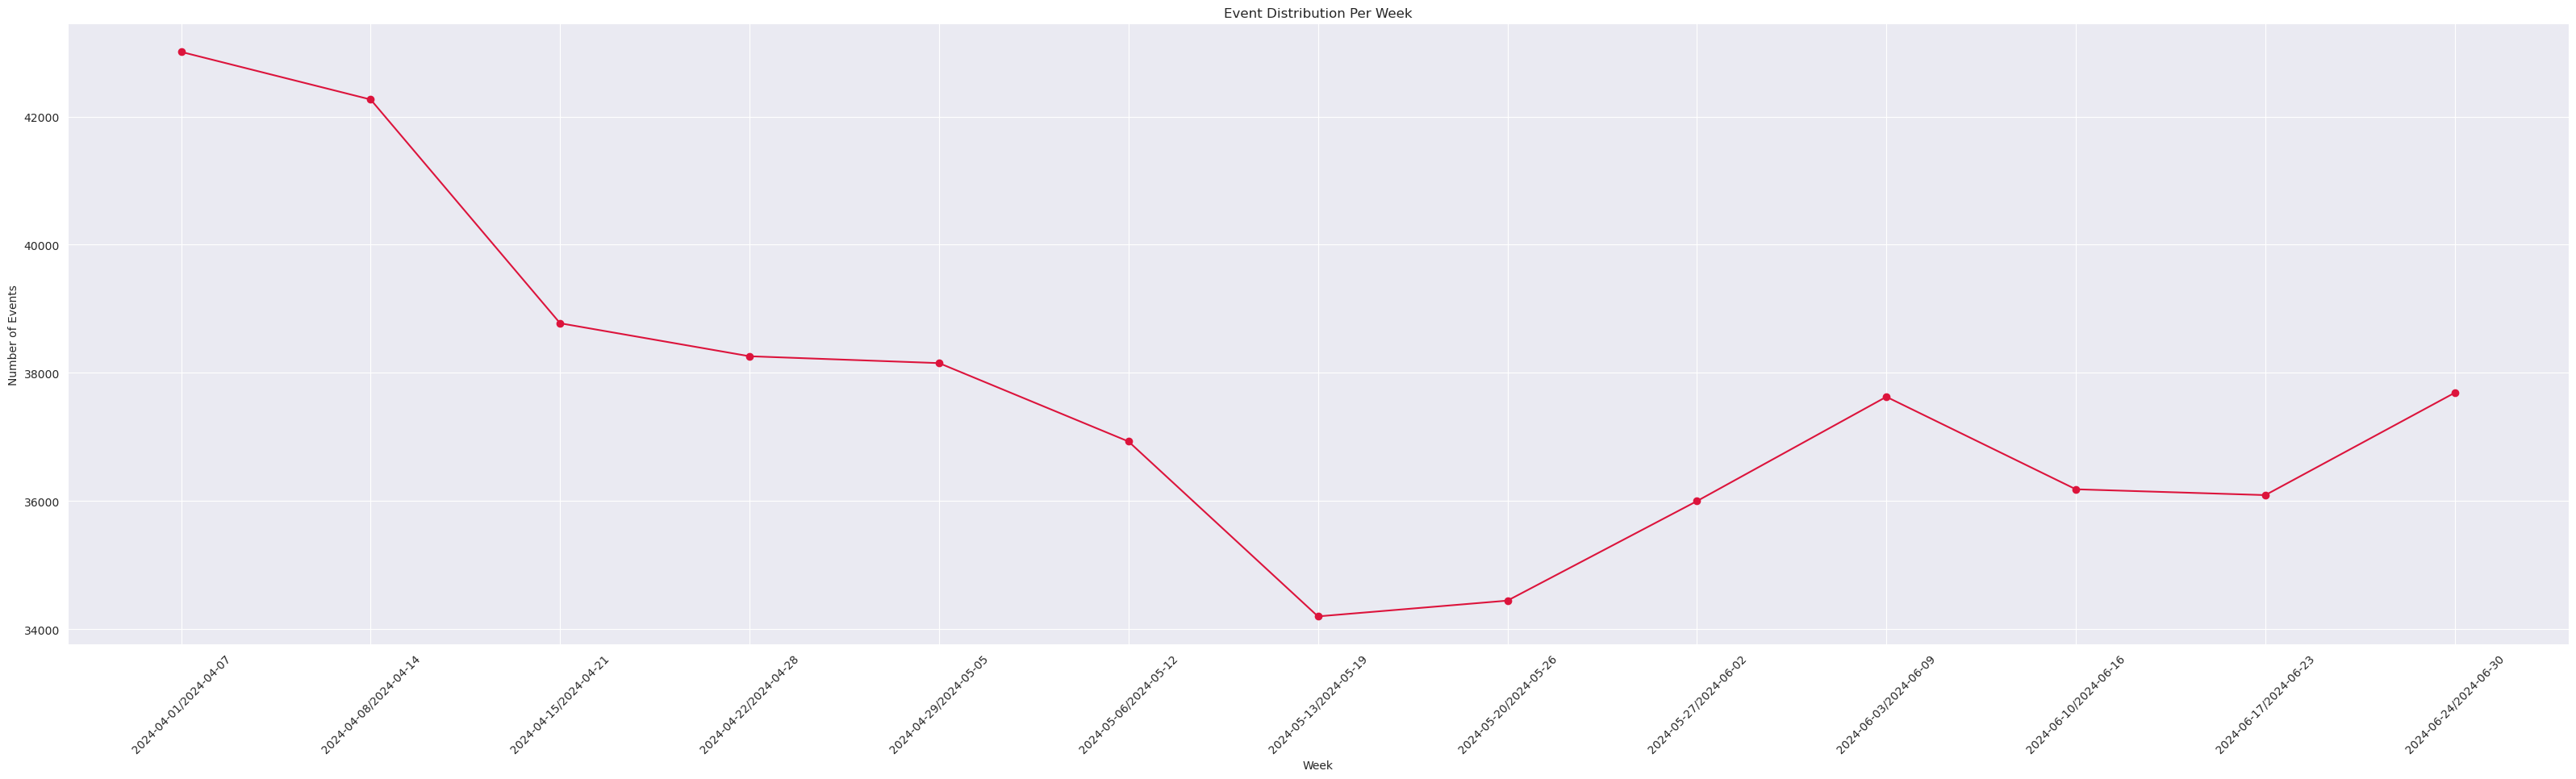

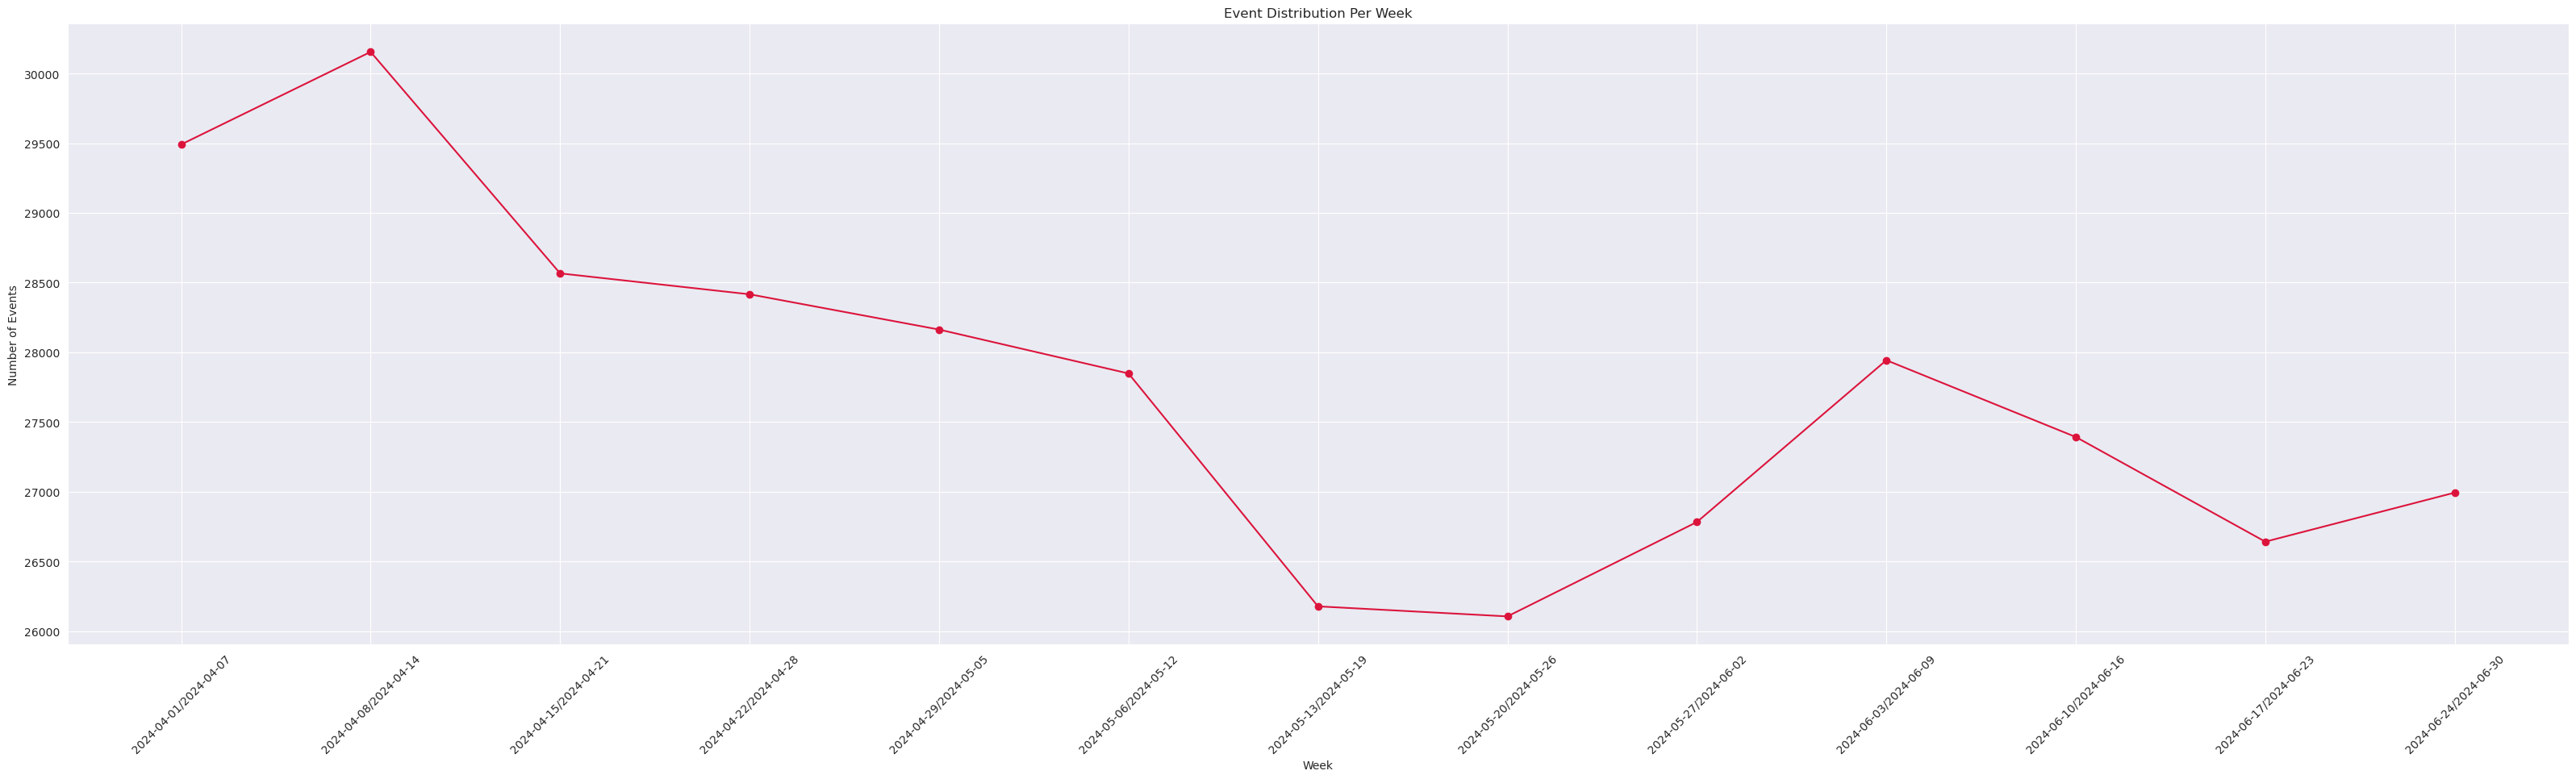

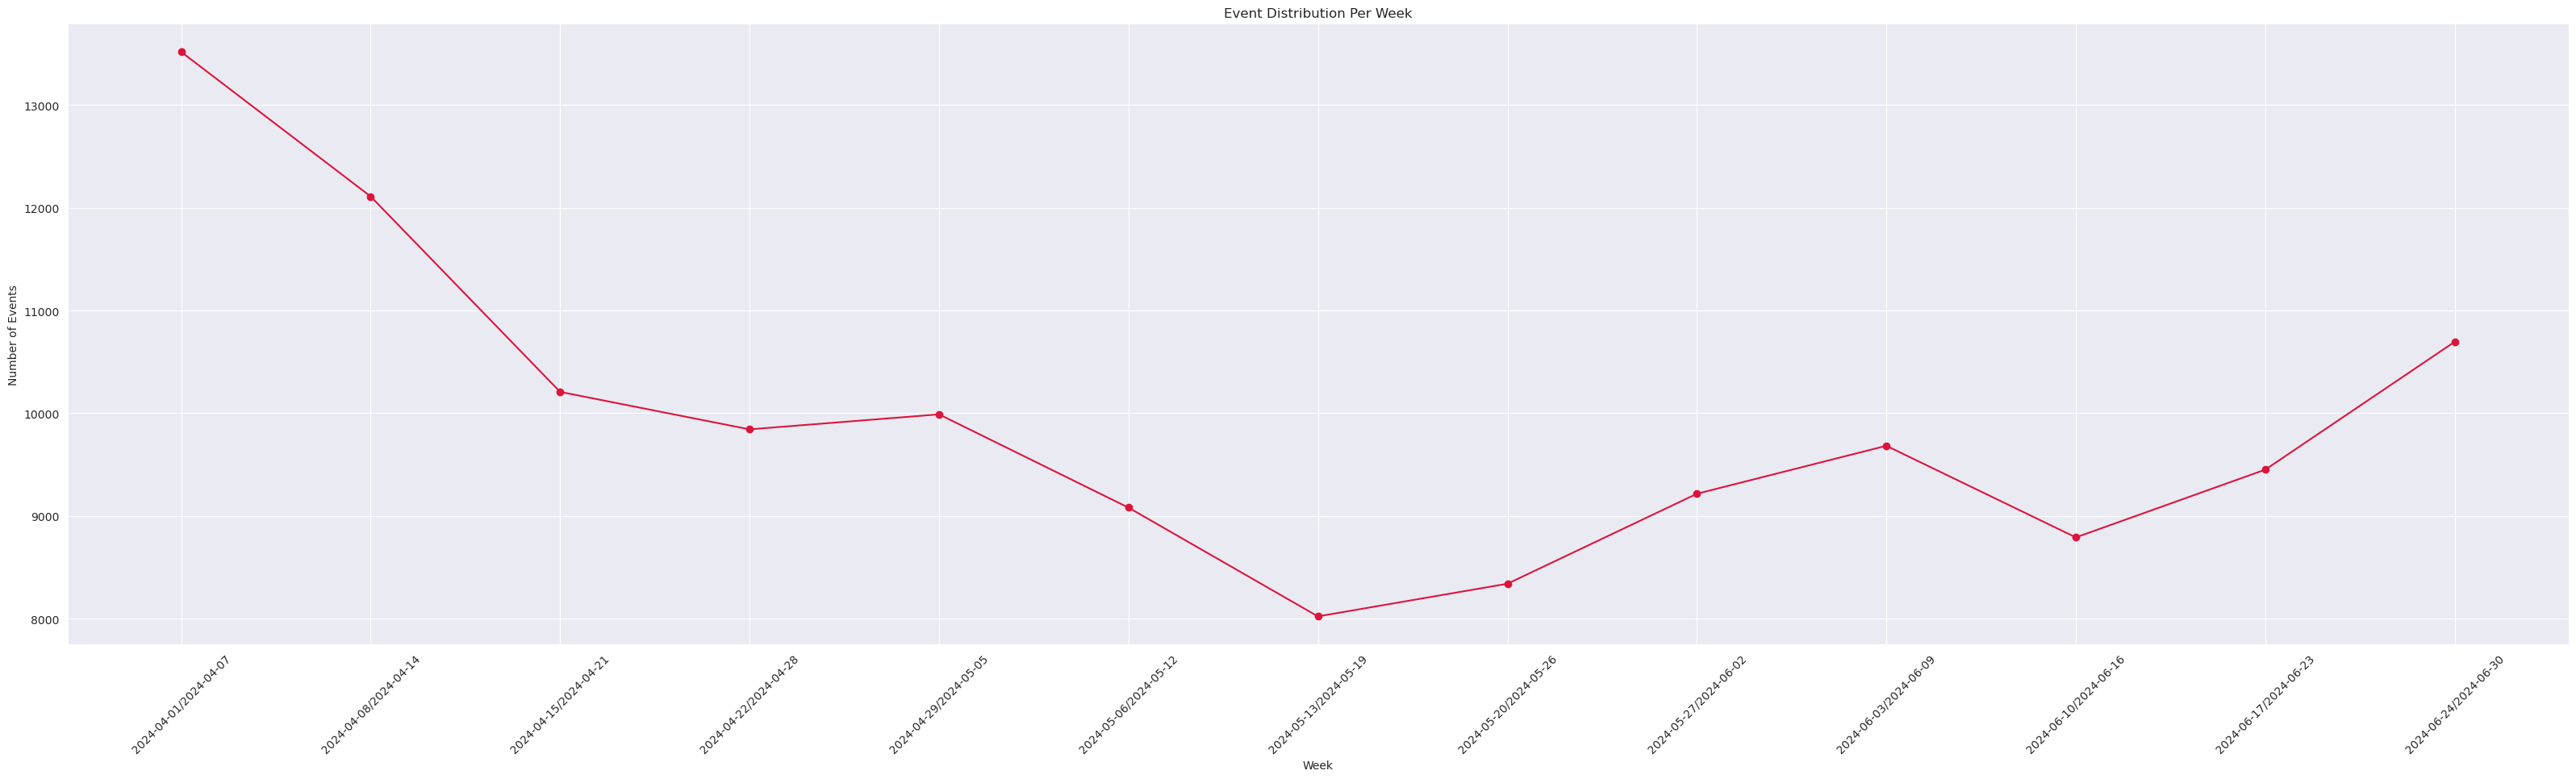

In [50]:
event_per_week(df_cleaned)
event_per_week(users_with_age_changes)
event_per_week(users_without_age_changes)